<a href="https://colab.research.google.com/github/IoannisZouras/MSc_Data_Science/blob/NLP/NLP_Group_Project_Jul24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Group Project NLP__

In [ ]:
!pip install lime
!pip install scikit-learn
!pip install nltk
!pip install spacy
!pip install wordcloud
!pip install matplotlib
!pip install pandas
!pip install tensorflow
!pip install pyspellchecker
!pip install gensim
!pip install pyLDAvis
!pip install transformers
!pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=58476600e6a2463ccd42680b9c422b0ca3d5419c9db9bbf511e921d4d113039c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import re
import pickle
import warnings
from spellchecker import SpellChecker
import spacy
from collections import Counter
from scipy.stats import randint
from spacy.tokens import DocBin
from spacy.training import Example
from tqdm import tqdm

# Plotting
import seaborn as sns

# NLTK
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')


# Gensim
import gensim
from gensim import corpora
from gensim.models import Word2Vec, CoherenceModel, LdaMulticore
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess

# Sklearn
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, auc, accuracy_score, mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.cluster import KMeans

# Deep Learning Models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# LIME
import lime
import lime.lime_tabular
from lime.lime_text import LimeTextExplainer
from scipy.special import expit

# BERT
from bertopic import BERTopic
import torch
import transformers as ppb
from transformers import DistilBertModel, DistilBertTokenizer

# Miscellaneous
from pprint import pprint
import os


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


## __1. Data Preprocessing and Normalization__

### __1.1 General information & statistics__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
# Assigning data into a variable

#data = pd.read_csv("tripadvisor_hotel_reviews.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#data = pd.read_csv('/Users/dimitrisalimpertis/Desktop/Dataset/tripadvisor_hotel_reviews.csv')
# Assigning data into a variable
data = pd.read_csv('/content/drive/My Drive/nlp/tripadvisor_hotel_reviews.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# General information

print("Shape of 'data': \n", data.shape)
print("\nDtypes of 'data': \n", data.dtypes.value_counts())
print("\n General information of 'data': \n")
print(data.info())
print("\nGeneral statistics of 'data': \n", data.describe())
print("\nHead of 'data': \n")
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of 'data': 
 (20491, 2)

Dtypes of 'data': 
 object    1
int64     1
Name: count, dtype: int64

 General information of 'data': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB
None

General statistics of 'data': 
              Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

Head of 'data': 



Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [ ]:
# Statistical properties of the numerical features of 'data'

print("Statistical properties of 'data' numerical features: \n")
data.describe()

Statistical properties of 'data' numerical features: 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

### __1.2 Initial column and row processing__

In [ ]:
# Extracting and ouputting each columns count of unique and duplicate values

columns = data.columns.tolist()

unique_elements_list = []

for column in columns:
    unique_element = data[column].nunique()
    duplicate_values = data[column].duplicated().sum()
    unique_elements_list.append({'Column name': column, '# Unique Elements': unique_element, '# Duplicate Elements': duplicate_values})

data_df = pd.DataFrame(unique_elements_list)

print("Table outputting # of unique & duplicated elements per column of 'data': \n")

data_df

Table outputting # of unique & duplicated elements per column of 'data': 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Column name  # Unique Elements  # Duplicate Elements
0      Review              20491                     0
1      Rating                  5                 20486

In [ ]:
# Dropping unneccessary duplicate values if any are present

shape_before = data.shape
data.drop_duplicates(inplace=True)
shape_after = data.shape

if shape_before == shape_after:
    print("No duplicates were present in 'data'. The shape remains: \n", shape_after)
else:
    print("Duplicates were present in the 'data'. The shape after dropping them is: \n", shape_after)

No duplicates were present in 'data'. The shape remains: 
 (20491, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### __1.3 NaN values__

In [ ]:
# Outputting columns of 'data' that contain missing values, their count, corresponding share & dtype

missing_percentage = data.isnull().mean() * 100
columns_with_missing_values_share = missing_percentage[missing_percentage > 0]

missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values_share = round(columns_with_missing_values_share,2)

columns_types = data[columns_with_missing_values.index].dtypes

missing_values_df = pd.DataFrame({'Count of NaN values' : columns_with_missing_values,
                                  'Share of NaN values' : columns_with_missing_values_share,
                                  'Dtype' : columns_types})

missing_values_df['Share of NaN values'] = missing_values_df['Share of NaN values'].astype(str) +' %'

print("Table showing the 'data' columns that contain NaN values and their respective share :\n")
missing_values_df.sort_values(by="Count of NaN values", ascending=False)

Table showing the 'data' columns that contain NaN values and their respective share :



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [Count of NaN values, Share of NaN values, Dtype]
Index: []

### __1.4 Visualizations__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


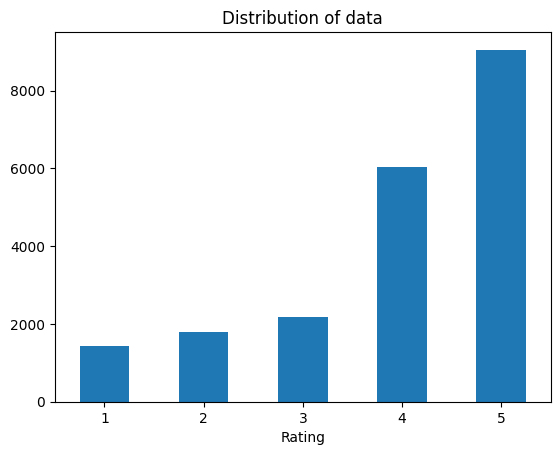

In [ ]:
# Plotting the distribution for 'data'

ax = data.groupby('Rating').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels([1,2,3,4,5], rotation=0);

### __1.5 Preprocessing__

In [ ]:
# Preprocessing function definitions

# Function to lowercase
def convert_to_lower_case(text):
    return text.lower()

# Function for removing stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# Function for removing urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)

# Function for removing html tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function for removing punctuation & special characters
def remove_irrelevant_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Function for removing duplicates
def remove_duplicate_text(df):
    return df.drop_duplicates()

# Function for spelling correction
spell = SpellChecker()
def spelling(text):
    corrected_words = []
    words = text.split()
    for word in words:
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)
    corrected_text = ' '.join(corrected_words)
    return corrected_text

# Defining a dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
           ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
           ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
           ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
           '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
           '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
           ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

def emoji(text):
    for em in emojis.keys():
        text = text.replace(em, "EMOJI" + emojis[em])
    return text


lemmatiser = WordNetLemmatizer()

# Preprocess function combining all operations
def preprocess_text(text_list):
    preprocessed_text = []

    for each_text in tqdm(text_list):
        result = convert_to_lower_case(each_text)
        result = emoji(result)
        result = remove_stopwords(result)
        result = remove_urls(result)
        result = remove_html_tags(result)
        result = remove_irrelevant_chars(result)
        result = spelling(result)
        result = ' '.join(lemmatiser.lemmatize(word, pos="v") for word in result.split())
        preprocessed_text.append(result.strip())

    return preprocessed_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sampling 1% of data

data = data.sample(frac=0.01, random_state=11)
print("1% sample of data shape:")
data.shape

1% sample of data shape:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(205, 2)

In [ ]:
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review  Rating
15870  interesting experience stayed kowloon 4 nights...       2
17531  great value location girls weekend, stayed thu...       5
7082   amazing trip, april husband decided needed vac...       5
13268  loved argonaut spent 3 nights argonaut located...       5
12156  great hotel definitely recommend staying hotel...       5
7152   excellence d.r, husband went secrets 1/18 1/24...       5
1856   excellent location 4th trip san fran stayed le...       4
20414  lovely stay big apple lovely place stay hectic...       5
17971  aesthetically beautiful pretty cheaply constru...       3
3537   fantastic vacation family 2 adults 2 teens sta...       5
15726  excellent hotel agree previous reviewers, loca...       5
6107   definately not 3.5 star hotel second trip norm...       2
2262   stayed hurricane katrina hit stayed best suite...       4
12608  good not great second time punta cana probably...       3
251    great cozy hoitel location great right westin ...       4
1075   excellent stay wow, fantastic stay, hotel perf...       5
2520   sweet staff lots little kids lowdown place hug...       3
6694   double d just came dominican dec. 6. just litt...       2
18100  list, stayed courtyard marriott nights, excell...       5
17006  chic hip bravo beach hotel seasoned travelers ...       5

In [ ]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(205, 2)

In [ ]:
# Applying functions to data

#data['Processed Review'] = data['Review'].apply(preprocess_text)

# Data after applying preprocessing functions



# Applying functions to data
data['Processed Review'] = preprocess_text(data['Review'].values)

print("Preprocessing completed\n")

print("data after preprocessing:")
data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 205/205 [14:35<00:00,  4.27s/it]

Preprocessing completed

data after preprocessing:


Review  Rating  \
15870  interesting experience stayed kowloon 4 nights...       2   
17531  great value location girls weekend, stayed thu...       5   
7082   amazing trip, april husband decided needed vac...       5   
13268  loved argonaut spent 3 nights argonaut located...       5   
12156  great hotel definitely recommend staying hotel...       5   

                                        Processed Review  
15870  interest experience stay kowloon 4 nights chec...  
17531  great value location girls weekend stay thursd...  
7082   amaze trip aril husband decide need vacation b...  
13268  love argonaut spend 3 nights argonaut locate f...  
12156  great hotel definitely recommend stay hotel lo...

In [ ]:
# Loading the en_core_web_sm from spacy for further capabilities.

nlp = spacy.load('en_core_web_sm')


# Function performing tokenization & lemmatization

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
       output = []
       for sent in texts:
            doc = nlp(sent)
            output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Converting 'Review' column to list

review = data['Review'].tolist()
print("Review element 0:\n", review[0],"\n")

Review element 0:
 interesting experience stayed kowloon 4 nights, checked small waiting quickly processed, arriving room fruit bowl did contain mouldy fruit n't really good start stay did leave note housekeeping replace fruit fresh produces done.the kowloon located short holiday.the restuarant buffet think good chef large range food selected breakfast dinner.when did check impression breakfast including package informed n't, ringing people resonsible booking informed hotel provide vochures, occured asking hotel, checking discovered breakfast provided free charge challenged removed bill.another time eating dinner night opted not buffet la carte instead, meal pleasant nothing special, did sit right busser station annoying eatting restauarant usually hard having sit busiers station worst constantly bumped restaurant not understand sat there.overall say probably not,   



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Review before applying tokenazation & lemmatization

print("review before applying tokenazation & lemmatization\n")
print(review[0],"\n")

# Running the lemmatization function on review

tokenized_reviews = lemmatization(review)

# Review after applying lemmatization

print("review after applying tokenazation & lemmatization:\n")
print(tokenized_reviews[0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review before applying tokenazation & lemmatization

interesting experience stayed kowloon 4 nights, checked small waiting quickly processed, arriving room fruit bowl did contain mouldy fruit n't really good start stay did leave note housekeeping replace fruit fresh produces done.the kowloon located short holiday.the restuarant buffet think good chef large range food selected breakfast dinner.when did check impression breakfast including package informed n't, ringing people resonsible booking informed hotel provide vochures, occured asking hotel, checking discovered breakfast provided free charge challenged removed bill.another time eating dinner night opted not buffet la carte instead, meal pleasant nothing special, did sit right busser station annoying eatting restauarant usually hard having sit busiers station worst constantly bumped restaurant not understand sat there.overall say probably not,   

review after applying tokenazation & lemmatization:

['interesting', 'experience', 's

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


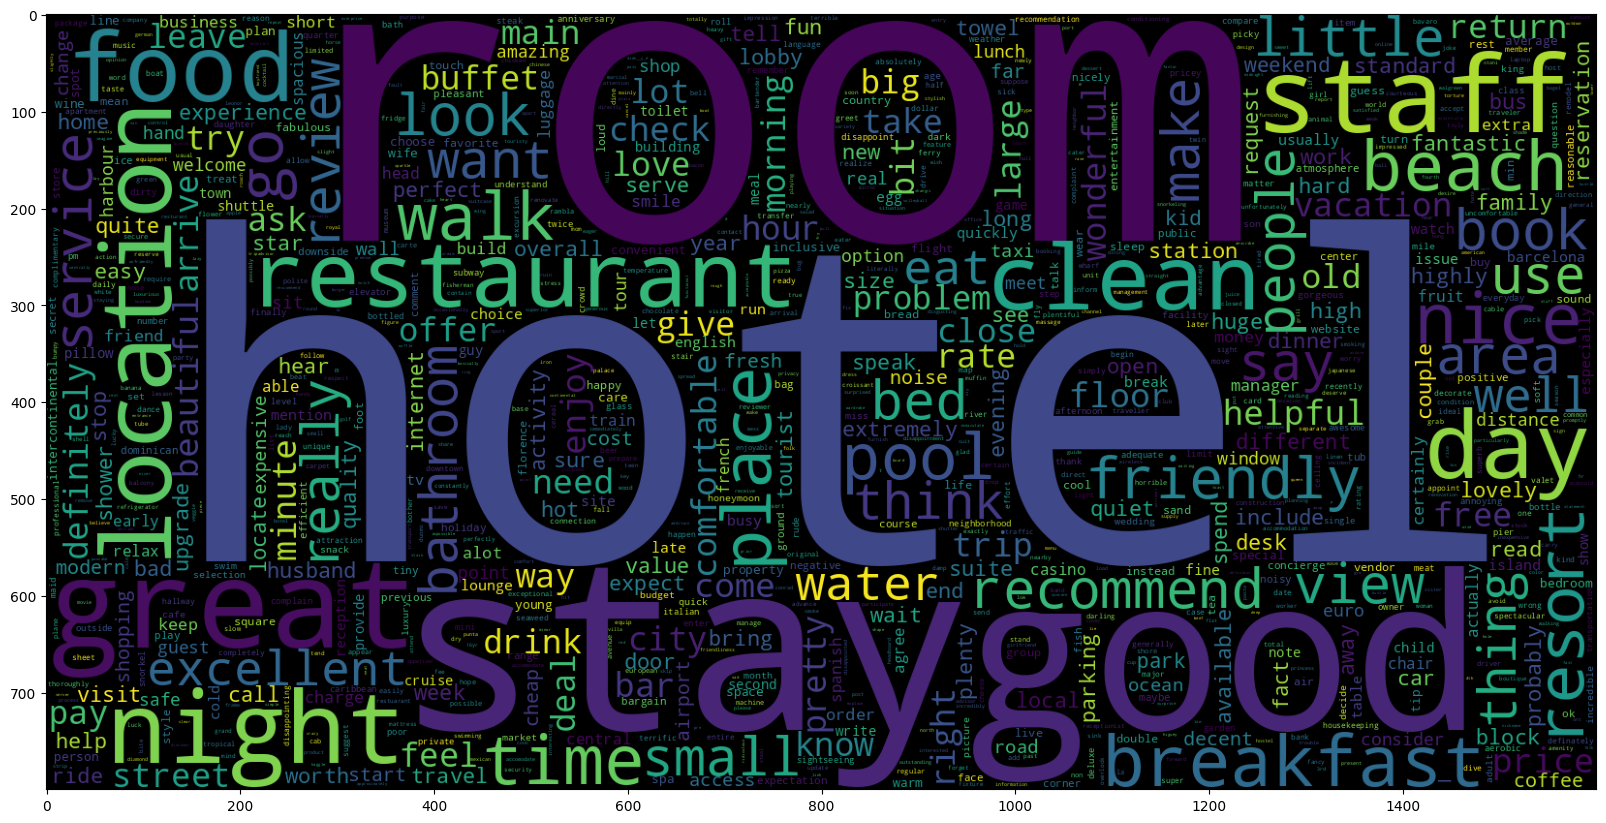

In [ ]:
# Wordcloud creation
review_2 = []
for element in tokenized_reviews:
    element2 = ' '.join(element)
    review_2.append(element2)

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review_2))
plt.imshow(wc)

In [ ]:
# Using wordcloud to display top 30 most frequent words

word_frequencies = wc.words_
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)
most_frequent_words = [word for word, freq in sorted_word_frequencies[:30]]

print("Most Common Words:")
for word in most_frequent_words:
    print(word)

Most Common Words:
hotel
room
stay
good
great
staff
night
location
food
day
restaurant
clean
breakfast
nice
beach
place
time
walk
resort
pool
go
friendly
look
book
view
recommend
little
bed
say
small


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Using wordcloud to display top 30 least frequent words

sorted_word_frequencies_ascending = sorted(word_frequencies.items(), key=lambda item: item[1])
least_frequent_words = [word for word, freq in sorted_word_frequencies_ascending[:30]]

print("Least Common Words:")
for word in least_frequent_words:
    print(word)

Least Common Words:
kowloon
waiting
bowl
ring
discover
worried
queen
stuff
minor
plaza
delicious
imagine
paint
notch
rough
4th
statement
prior
sparkle
stain
fast
cart
describe
explain
man
pull
hole
sell
neat
luckily


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying lemmatization and tokenization function

data['Lemmatized Review']=data['Processed Review'].apply(lambda x: lemmatization([x])[0])
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review  Rating  \
15870  interesting experience stayed kowloon 4 nights...       2   
17531  great value location girls weekend, stayed thu...       5   
7082   amazing trip, april husband decided needed vac...       5   
13268  loved argonaut spent 3 nights argonaut located...       5   
12156  great hotel definitely recommend staying hotel...       5   

                                        Processed Review  \
15870  interest experience stay kowloon 4 nights chec...   
17531  great value location girls weekend stay thursd...   
7082   amaze trip aril husband decide need vacation b...   
13268  love argonaut spend 3 nights argonaut locate f...   
12156  great hotel definitely recommend stay hotel lo...   

                                       Lemmatized Review  
15870  [interest, experience, stay, kowloon, night, c...  
17531  [great, value, location, girl, weekend, stay, ...  
7082   [amaze, trip, husband, decide, need, vacation,...  
13268  [love, spend, night, wharf, location, pier, bl...  
12156  [great, hotel, definitely, recommend, stay, ho...

In [ ]:
# Removing frequent words from data's Lemmatized Review column based on wordcloud's most frequent words

most_indices = [0,1,2,5,6,7,8,9,10,18]
most_to_drop = [most_frequent_words[i] for i in most_indices]

least_indices = range(30)
least_to_drop = [least_frequent_words[i] for i in least_indices]

def remove_words(words_list, words_to_remove):
    return [word for word in words_list if word not in words_to_remove]

data['Lemmatized Review'] = data['Lemmatized Review'].apply(lambda x: remove_words(x, most_to_drop))
data['Lemmatized Review'] = data['Lemmatized Review'].apply(lambda x: remove_words(x, least_to_drop))

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review  Rating  \
15870  interesting experience stayed kowloon 4 nights...       2   
17531  great value location girls weekend, stayed thu...       5   
7082   amazing trip, april husband decided needed vac...       5   
13268  loved argonaut spent 3 nights argonaut located...       5   
12156  great hotel definitely recommend staying hotel...       5   

                                        Processed Review  \
15870  interest experience stay kowloon 4 nights chec...   
17531  great value location girls weekend stay thursd...   
7082   amaze trip aril husband decide need vacation b...   
13268  love argonaut spend 3 nights argonaut locate f...   
12156  great hotel definitely recommend stay hotel lo...   

                                       Lemmatized Review  
15870  [interest, experience, check, small, wait, qui...  
17531  [great, value, girl, weekend, sundae, girl, we...  
7082   [amaze, trip, husband, decide, need, vacation,...  
13268  [love, spend, wharf, pier, block, away, easy, ...  
12156  [great, definitely, recommend, great, easy, wa...

In [ ]:
# POS tagging function creation

def pos_tagging(tokens):
    pos_tags = []
    for token in tokens:
        doc = nlp(token)
        pos_tags.extend([(token.text, token.pos_) for token in doc])
    return pos_tags

# Applying the function on data's Lemmatized Review column

data['POS Tags'] = data['Lemmatized Review'].apply(pos_tagging)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review  Rating  \
15870  interesting experience stayed kowloon 4 nights...       2   
17531  great value location girls weekend, stayed thu...       5   
7082   amazing trip, april husband decided needed vac...       5   
13268  loved argonaut spent 3 nights argonaut located...       5   
12156  great hotel definitely recommend staying hotel...       5   

                                        Processed Review  \
15870  interest experience stay kowloon 4 nights chec...   
17531  great value location girls weekend stay thursd...   
7082   amaze trip aril husband decide need vacation b...   
13268  love argonaut spend 3 nights argonaut locate f...   
12156  great hotel definitely recommend stay hotel lo...   

                                       Lemmatized Review  \
15870  [interest, experience, check, small, wait, qui...   
17531  [great, value, girl, weekend, sundae, girl, we...   
7082   [amaze, trip, husband, decide, need, vacation,...   
13268  [love, spend, wharf, pier, block, away, easy, ...   
12156  [great, definitely, recommend, great, easy, wa...   

                                                POS Tags  
15870  [(interest, NOUN), (experience, VERB), (check,...  
17531  [(great, ADJ), (value, NOUN), (girl, NOUN), (w...  
7082   [(amaze, VERB), (trip, NOUN), (husband, NOUN),...  
13268  [(love, NOUN), (spend, VERB), (wharf, NOUN), (...  
12156  [(great, ADJ), (definitely, ADV), (recommend, ...

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


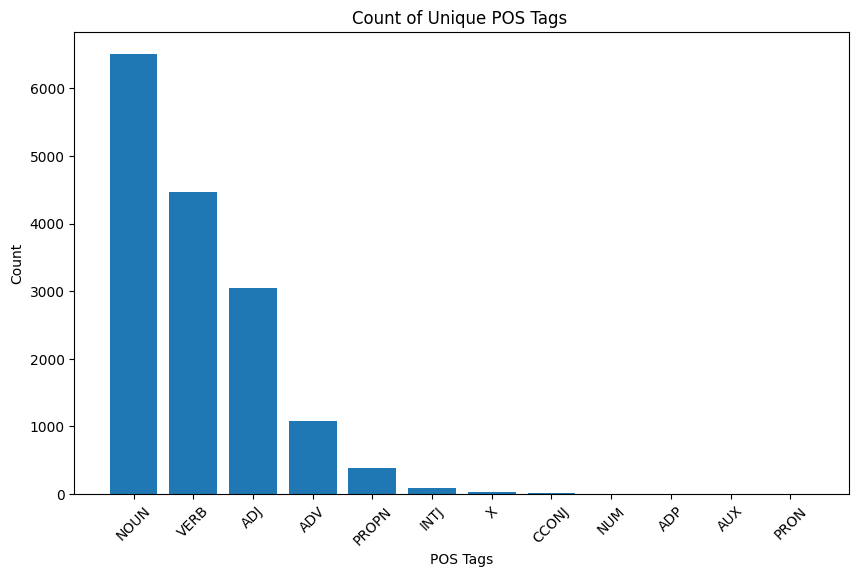

In [ ]:
# Plotting unique pos tags and their counts

all_pos_tags = [tag for tags in data['POS Tags'] for _, tag in tags]
pos_counts = Counter(all_pos_tags)
pos_counts = dict(sorted(pos_counts.items(), key=lambda item: item[1], reverse=True))
unique_pos_tags = list(pos_counts.keys())
unique_counts = list(pos_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(unique_pos_tags, unique_counts)
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.title('Count of Unique POS Tags ')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Map the the Score into 0 or 1, and store into a Positivity colunn

data['Positivity'] = np.where(data['Rating'] >= 3, 1, 0)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Review  Rating  \
15870  interesting experience stayed kowloon 4 nights...       2   
17531  great value location girls weekend, stayed thu...       5   
7082   amazing trip, april husband decided needed vac...       5   
13268  loved argonaut spent 3 nights argonaut located...       5   
12156  great hotel definitely recommend staying hotel...       5   

                                        Processed Review  \
15870  interest experience stay kowloon 4 nights chec...   
17531  great value location girls weekend stay thursd...   
7082   amaze trip aril husband decide need vacation b...   
13268  love argonaut spend 3 nights argonaut locate f...   
12156  great hotel definitely recommend stay hotel lo...   

                                       Lemmatized Review  \
15870  [interest, experience, check, small, wait, qui...   
17531  [great, value, girl, weekend, sundae, girl, we...   
7082   [amaze, trip, husband, decide, need, vacation,...   
13268  [love, spend, wharf, pier, block, away, easy, ...   
12156  [great, definitely, recommend, great, easy, wa...   

                                                POS Tags  Positivity  
15870  [(interest, NOUN), (experience, VERB), (check,...           0  
17531  [(great, ADJ), (value, NOUN), (girl, NOUN), (w...           1  
7082   [(amaze, VERB), (trip, NOUN), (husband, NOUN),...           1  
13268  [(love, NOUN), (spend, VERB), (wharf, NOUN), (...           1  
12156  [(great, ADJ), (definitely, ADV), (recommend, ...           1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


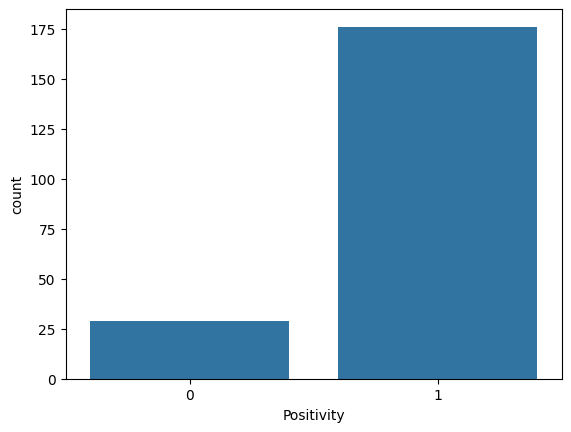

In [ ]:
# Plotting a frequency distribution of 'Positivity'

sns.countplot(x="Positivity", data=data);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


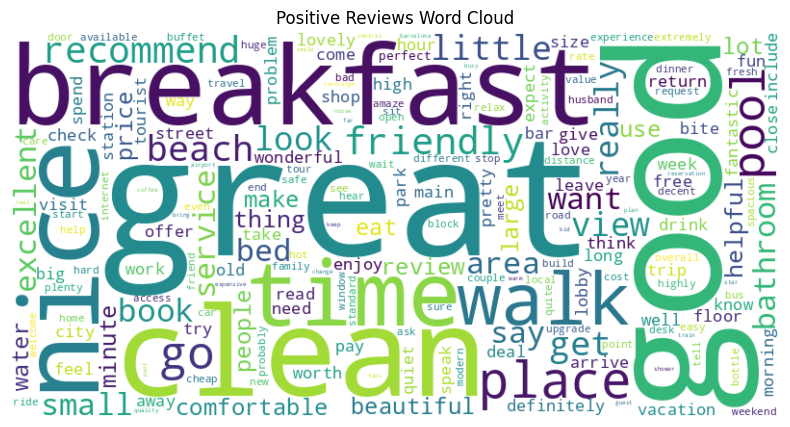

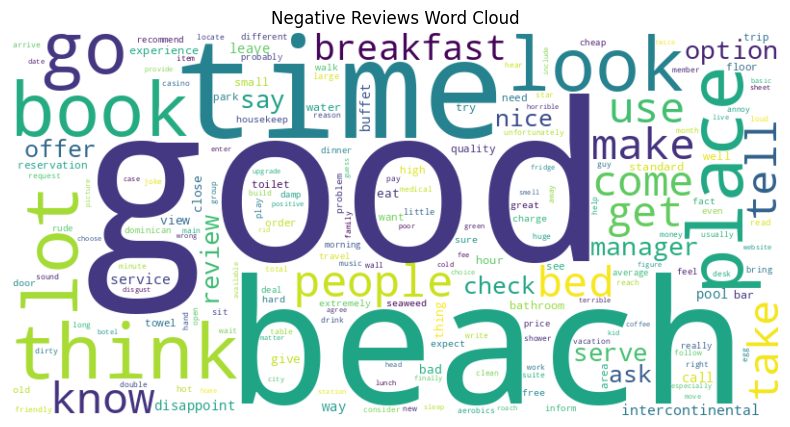

In [ ]:
# Creating wordclouds for positive (1) and negative (0) sentiment

positive_reviews = data[data['Positivity'] == 1]
negative_reviews = data[data['Positivity'] == 0]

def get_most_frequent_words(lemmatized_reviews):
    all_words = [word for review in lemmatized_reviews for word in review]
    word_counts = Counter(all_words)
    return dict(word_counts)

positive_word_freq = get_most_frequent_words(positive_reviews['Lemmatized Review'])
negative_word_freq = get_most_frequent_words(negative_reviews['Lemmatized Review'])

def create_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

create_wordcloud(positive_word_freq, 'Positive Reviews Word Cloud')
create_wordcloud(negative_word_freq, 'Negative Reviews Word Cloud')

In [ ]:
# Stratified train / test split, since y (in this case data['Positivity']) is imbalanced

data['Joined Lemmatized Review'] = data['Lemmatized Review'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Joined Lemmatized Review'], data['Positivity'], test_size = 0.20, random_state = 0, stratify = data['Positivity'])

print('X_train shape: ', X_train.shape, '\n')
print('X_test shape: ', X_test.shape, '\n')
print('y_train shape: ',y_train.shape, '\n')
print('y_test shape: ', y_test.shape, '\n')

X_train shape:  (164,) 

X_test shape:  (41,) 

y_train shape:  (164,) 

y_test shape:  (41,) 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## __2. Feature Engineering & Text Visualization__

### __2.1 Bag of Words - BoW__

In [ ]:
# Base BoW Vectorization

bow_vect_base = CountVectorizer()
X_train_bow_vect_base = bow_vect_base.fit_transform(X_train)
X_test_bow_vect_base  = bow_vect_base.transform(X_test)

# Param BoW Vectorization

bow_vect = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X_train_bow_vect = bow_vect.fit_transform(X_train)
X_test_bow_vect  = bow_vect.transform(X_test)

# Param BoW Vectorization

bow_ngram_vect = CountVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5, stop_words='english')
X_train_bow_ngram_vect = bow_ngram_vect.fit_transform(X_train)
X_test_bow_ngram_vect  = bow_ngram_vect.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Ouputting :100 features names and length of base Bow
print('Base Bow :100 feature names:')
bow_feature_names_base = bow_vect_base.get_feature_names_out()
print(bow_feature_names_base[:100], '\n')
print('Length of base Bow feature names:')
len_bow_base = len(bow_vect_base.get_feature_names_out())
print(len_bow_base)
print('\n')

# Ouputting :100 features names and length of Bow incl parameters
print('Param Bow :100 feature names:')
bow_feature_names_vect = bow_vect.get_feature_names_out()
print(bow_feature_names_vect[:100], '\n')
print('Length of param Bow feature names:')
len_bow_vect = len(bow_vect.get_feature_names_out())
print(len_bow_vect)
print('\n')

# Ouputting :100 features names and length of Bow incl parameters and n-grams
print('Param & n-gram Bow :100 feature names:')
bow_feature_names_ngram_vect = bow_ngram_vect.get_feature_names_out()
print(bow_feature_names_ngram_vect[:100], '\n')
print('Length of param & n-gram Bow feature names:')
len_bow_ngram_vect = len(bow_ngram_vect.get_feature_names_out())
print(len_bow_ngram_vect)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Base Bow :100 feature names:
['1030am' '16yr' '230am' '2saturday' '700am' 'abetter' 'able' 'absolute'
 'absolutely' 'abysmal' 'academia' 'accept' 'acceptable' 'access'
 'accessible' 'accommodate' 'accommodation' 'accompany' 'accord' 'account'
 'accurate' 'action' 'activity' 'actual' 'actually' 'ad' 'add' 'addition'
 'additional' 'additionally' 'address' 'adequate' 'adjacent' 'adjust'
 'adult' 'advance' 'advantage' 'adventure' 'adventurous' 'advert'
 'advertise' 'advice' 'advise' 'advisor' 'aerobe' 'aerobic' 'aerobics'
 'aesthetically' 'affect' 'affinity' 'affix' 'afternoon' 'again'
 'againonly' 'age' 'agent' 'aggressive' 'aggressively' 'ago' 'agree'
 'ahead' 'air' 'airconditione' 'airconditioning' 'airfare' 'airline'
 'airplane' 'airport' 'alcohol' 'ale' 'allegedly' 'alleviate'
 'allinclusive' 'allow' 'allyoucaneat' 'allée' 'almost' 'alrightnot'
 'alternative' 'alternatively' 'amaze' 'amazingly' 'ambiance' 'ambience'
 'amenity' 'amiss' 'ample' 'amplify' 'amsterdam' 'animal' 'animation'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


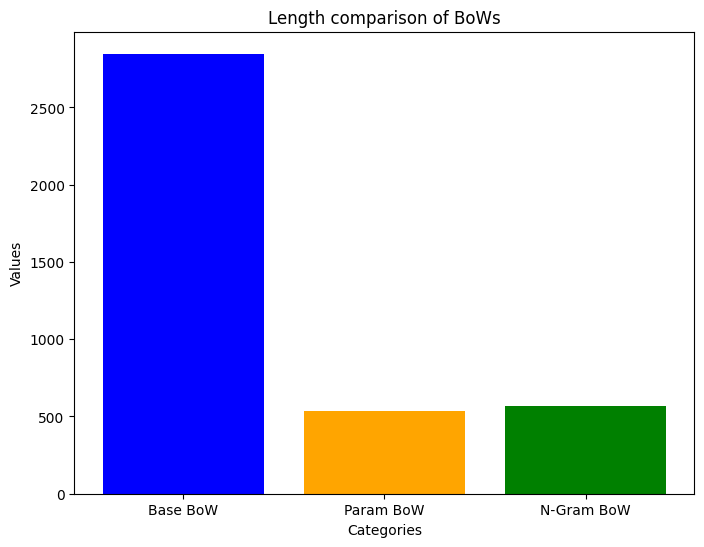

In [ ]:
# Plotting bar graph comparing the lengths of TF-IDFs variations

values = [len_bow_base, len_bow_vect, len_bow_ngram_vect]
labels = ['Base BoW', 'Param BoW', 'N-Gram BoW']


plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Length comparison of BoWs')
plt.show()

### __2.2 TF-IDF__

In [ ]:
# Instantiating TfidfVectorizer without parameters

tfidf_base_vect = TfidfVectorizer()
X_train_tfidf = tfidf_base_vect.fit_transform(X_train)
X_test_tfidf = tfidf_base_vect.transform(X_test)

# Instantiating TfidfVectorizer including parameters

tfidf_vect = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
X_train_tfidf_vect = tfidf_vect.fit_transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

# Instantiating TfidfVectorizer including parameters & n-grams

tfidf_ngram_vect = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5, stop_words='english')
X_train_tfidf_ngram_vect = tfidf_ngram_vect.fit_transform(X_train)
X_test_tfidf_ngram_vect = tfidf_ngram_vect.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Ouputting :100 features names and length of base TF-IDF
print('Base TF-IDF :100 feature names:')
tfidf_feature_names_base = tfidf_base_vect.get_feature_names_out()
print(tfidf_feature_names_base[:100], '\n')
print('Length of base TF-IDF feature names:')
len_tfidf_base = len(tfidf_base_vect.get_feature_names_out())
print(len_tfidf_base)
print('\n')

# Ouputting :100 features names and length of TF-IDF incl parameters
print('Param TF-IDF :100 feature names:')
tfidf_feature_names_vect = tfidf_vect.get_feature_names_out()
print(tfidf_feature_names_vect[:100], '\n')
print('Length of param TF-IDF feature names:')
len_tfidf_vect = len(tfidf_vect.get_feature_names_out())
print(len_tfidf_vect)
print('\n')

# Ouputting :100 features names and length of TF-IDF incl parameters and n-grams
print('Param & n-gram TF-IDF :100 feature names:')
tfidf_feature_names_ngram_vect = tfidf_ngram_vect.get_feature_names_out()
print(tfidf_feature_names_ngram_vect[:100], '\n')
print('Length of param & n-gram TF-IDF feature names:')
len_tfidf_ngram_vect = len(tfidf_ngram_vect.get_feature_names_out())
print(len_tfidf_ngram_vect)

Base TF-IDF :100 feature names:
['1030am' '16yr' '230am' '2saturday' '700am' 'abetter' 'able' 'absolute'
 'absolutely' 'abysmal' 'academia' 'accept' 'acceptable' 'access'
 'accessible' 'accommodate' 'accommodation' 'accompany' 'accord' 'account'
 'accurate' 'action' 'activity' 'actual' 'actually' 'ad' 'add' 'addition'
 'additional' 'additionally' 'address' 'adequate' 'adjacent' 'adjust'
 'adult' 'advance' 'advantage' 'adventure' 'adventurous' 'advert'
 'advertise' 'advice' 'advise' 'advisor' 'aerobe' 'aerobic' 'aerobics'
 'aesthetically' 'affect' 'affinity' 'affix' 'afternoon' 'again'
 'againonly' 'age' 'agent' 'aggressive' 'aggressively' 'ago' 'agree'
 'ahead' 'air' 'airconditione' 'airconditioning' 'airfare' 'airline'
 'airplane' 'airport' 'alcohol' 'ale' 'allegedly' 'alleviate'
 'allinclusive' 'allow' 'allyoucaneat' 'allée' 'almost' 'alrightnot'
 'alternative' 'alternatively' 'amaze' 'amazingly' 'ambiance' 'ambience'
 'amenity' 'amiss' 'ample' 'amplify' 'amsterdam' 'animal' 'animati

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function definition for plotting in descending order feature importance for different vectorization techniques

def feature_impo(xtrain,features,title):
  matrix = pd.DataFrame(xtrain.toarray(), columns=features)
  mean = matrix.mean()
  top = mean.sort_values(ascending=False).head(10)

  plt.figure(figsize=(10, 6))
  top.plot(kind='bar')
  plt.xlabel('Features')
  plt.ylabel('Mean TF-IDF Score')
  plt.title(f'Feature importance of {title}')
  plt.xticks(rotation=45)
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


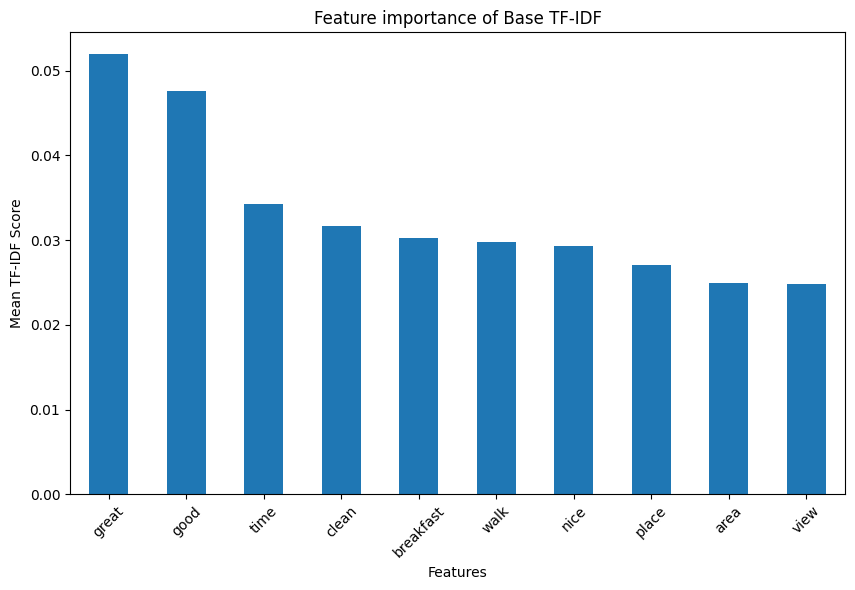

In [ ]:
# Calling feature_impo for base TF-IDF
feature_impo(X_train_tfidf,tfidf_feature_names_base, "Base TF-IDF")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


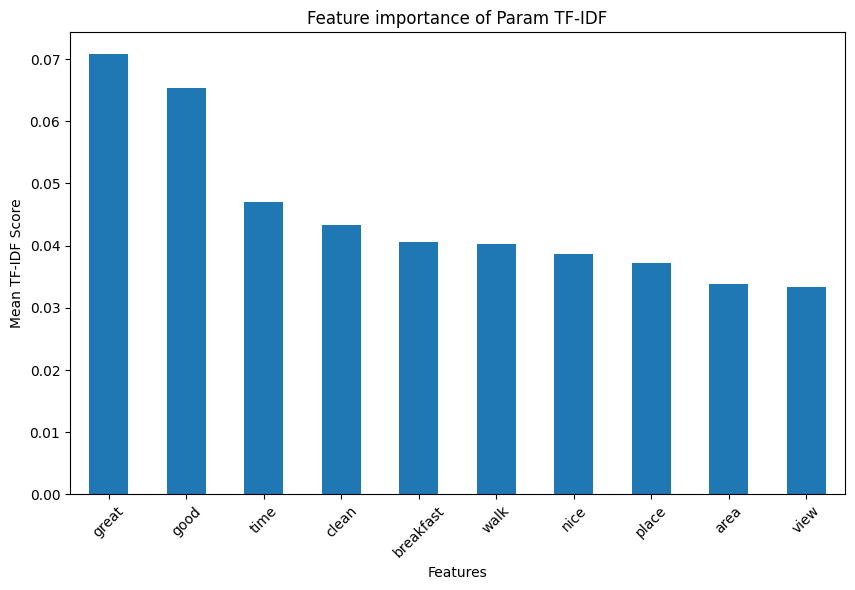

In [ ]:
# Calling feature_impo for param TF-IDF
feature_impo(X_train_tfidf_vect,tfidf_feature_names_vect, "Param TF-IDF")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


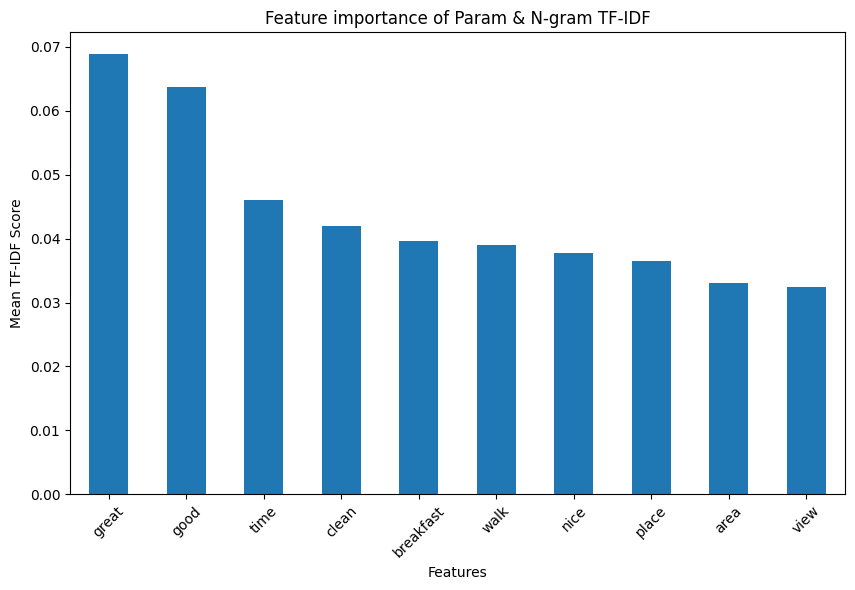

In [ ]:
# Calling feature_impo for param & n-gram TF-IDF
feature_impo(X_train_tfidf_ngram_vect,tfidf_feature_names_ngram_vect, "Param & N-gram TF-IDF")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


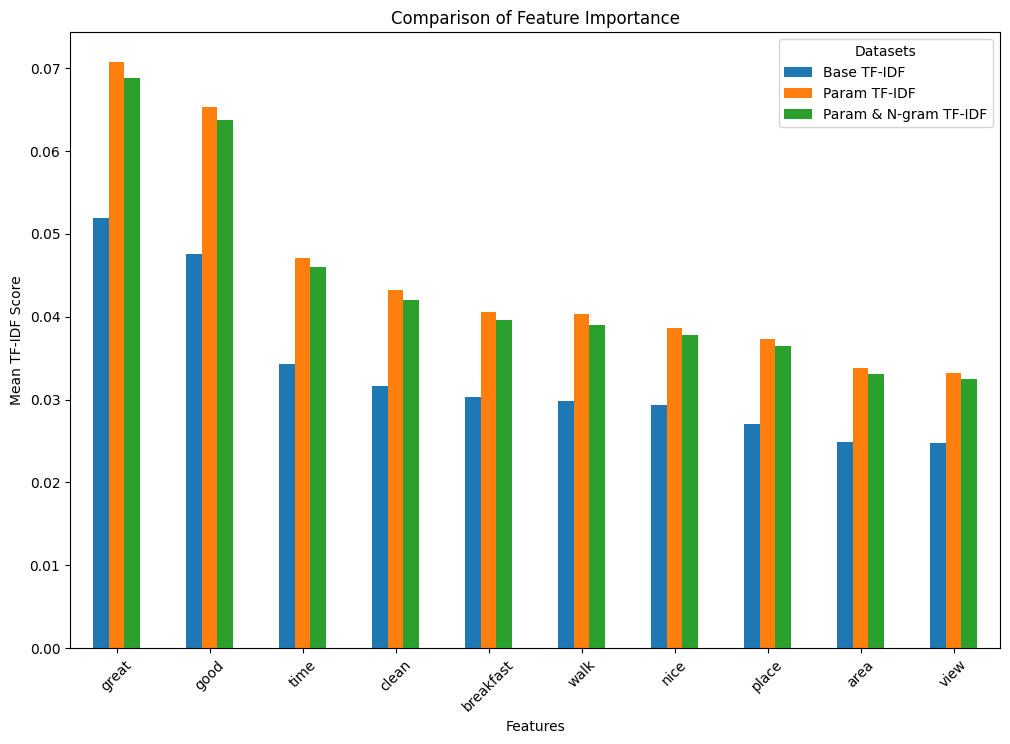

In [ ]:
# Plotting and comparing TF-IDF models

def mean_tfidf(xtrain, features):
    matrix = pd.DataFrame(xtrain.toarray(), columns=features)
    mean_tfidf = matrix.mean()
    return mean_tfidf

def compare_feature_impo(xtrain1, features1, title1, xtrain2, features2, title2, xtrain3, features3, title3):
    mean1 = mean_tfidf(xtrain1, features1)
    mean2 = mean_tfidf(xtrain2, features2)
    mean3 = mean_tfidf(xtrain3, features3)

    comparison_df = pd.DataFrame({
        title1: mean1,
        title2: mean2,
        title3: mean3
    })

    top_features = comparison_df.mean(axis=1).sort_values(ascending=False).head(10).index

    comparison_df = comparison_df.loc[top_features]

    comparison_df.plot(kind='bar', figsize=(12, 8))
    plt.xlabel('Features')
    plt.ylabel('Mean TF-IDF Score')
    plt.title('Comparison of Feature Importance')
    plt.xticks(rotation=45)
    plt.legend(title='Datasets')
    plt.show()

compare_feature_impo(X_train_tfidf,tfidf_feature_names_base, "Base TF-IDF", X_train_tfidf_vect,tfidf_feature_names_vect, "Param TF-IDF", X_train_tfidf_ngram_vect,tfidf_feature_names_ngram_vect, "Param & N-gram TF-IDF")

### __2.3 BoW & TF-IDF Visualization & Clustering__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


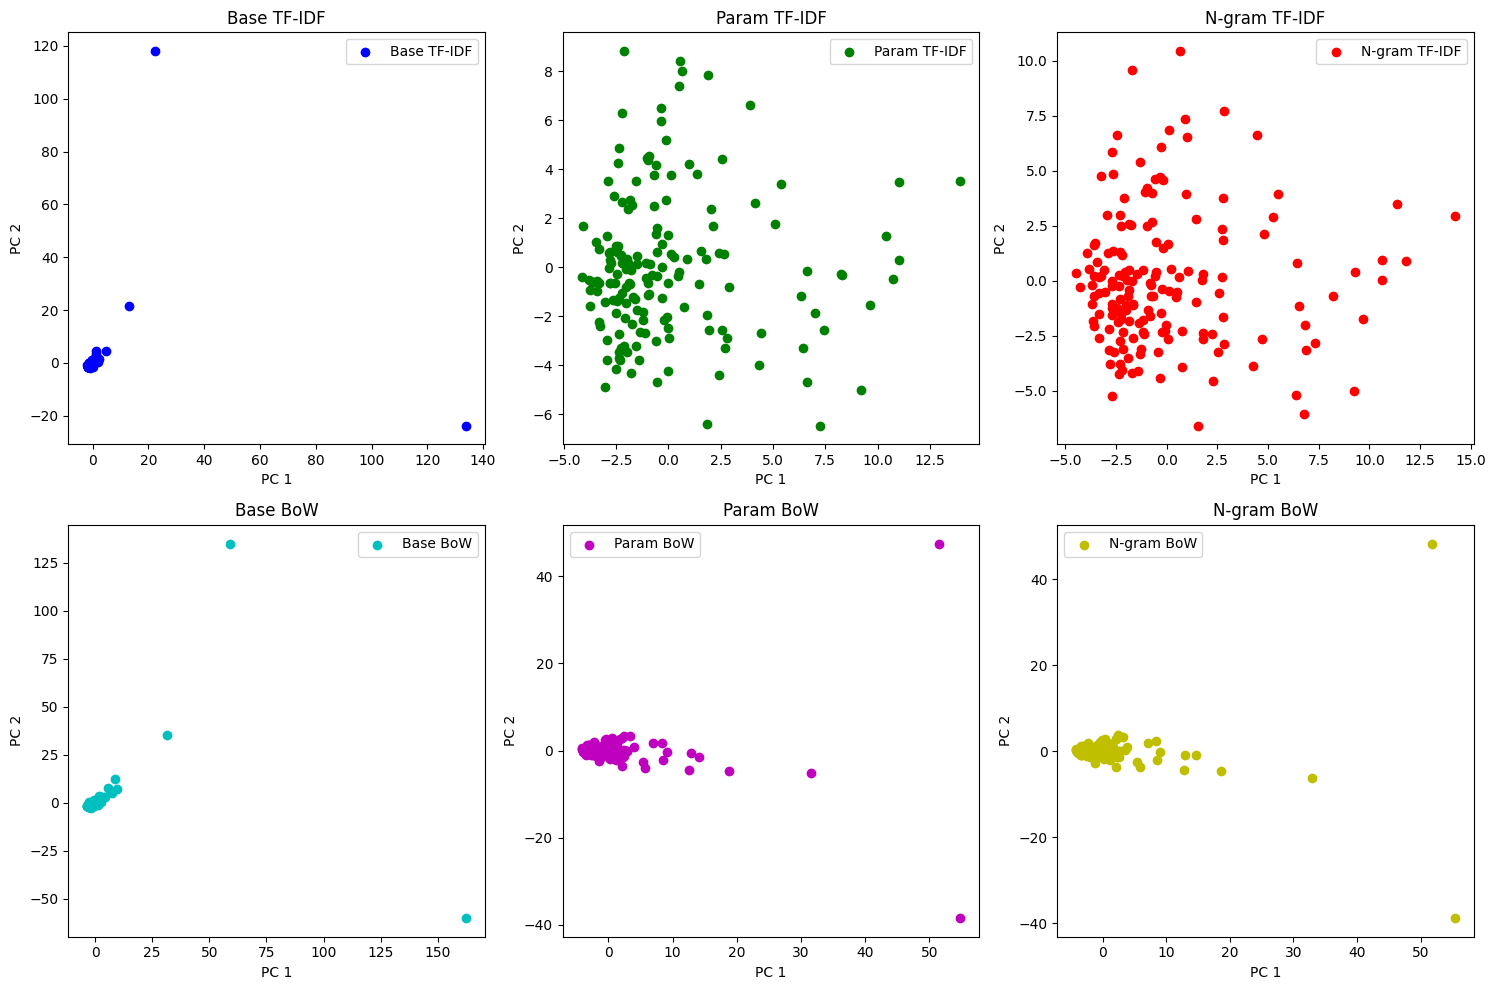

In [ ]:
# PCA function for dimensionality reduction and visualization whilst comparing different CBOW & Skip-gram models

def pca_plot(models_data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    colors = ['b', 'g', 'r', 'c', 'm', 'y']

    for i, (model_name, xtrain, features) in enumerate(models_data):
        ax = axes[i]
        matrix = pd.DataFrame(xtrain.toarray(), columns=features)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(matrix)

        pca = PCA(n_components=2)
        model_pca = pca.fit_transform(X_scaled)
        df_pca = pd.DataFrame(model_pca, columns=['PC1', 'PC2'])

        ax.scatter(df_pca['PC1'], df_pca['PC2'], color=colors[i], label=model_name)
        ax.set_title(model_name)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.legend()

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

models_data = [
    ('Base TF-IDF', X_train_tfidf, tfidf_feature_names_base),
    ('Param TF-IDF', X_train_tfidf_vect, tfidf_feature_names_vect),
    ('N-gram TF-IDF', X_train_tfidf_ngram_vect, tfidf_feature_names_ngram_vect),
    ('Base BoW', X_train_bow_vect_base, bow_feature_names_base),
    ('Param BoW', X_train_bow_vect, bow_feature_names_vect),
    ('N-gram BoW', X_train_bow_ngram_vect, bow_feature_names_ngram_vect)
]

pca_plot(models_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


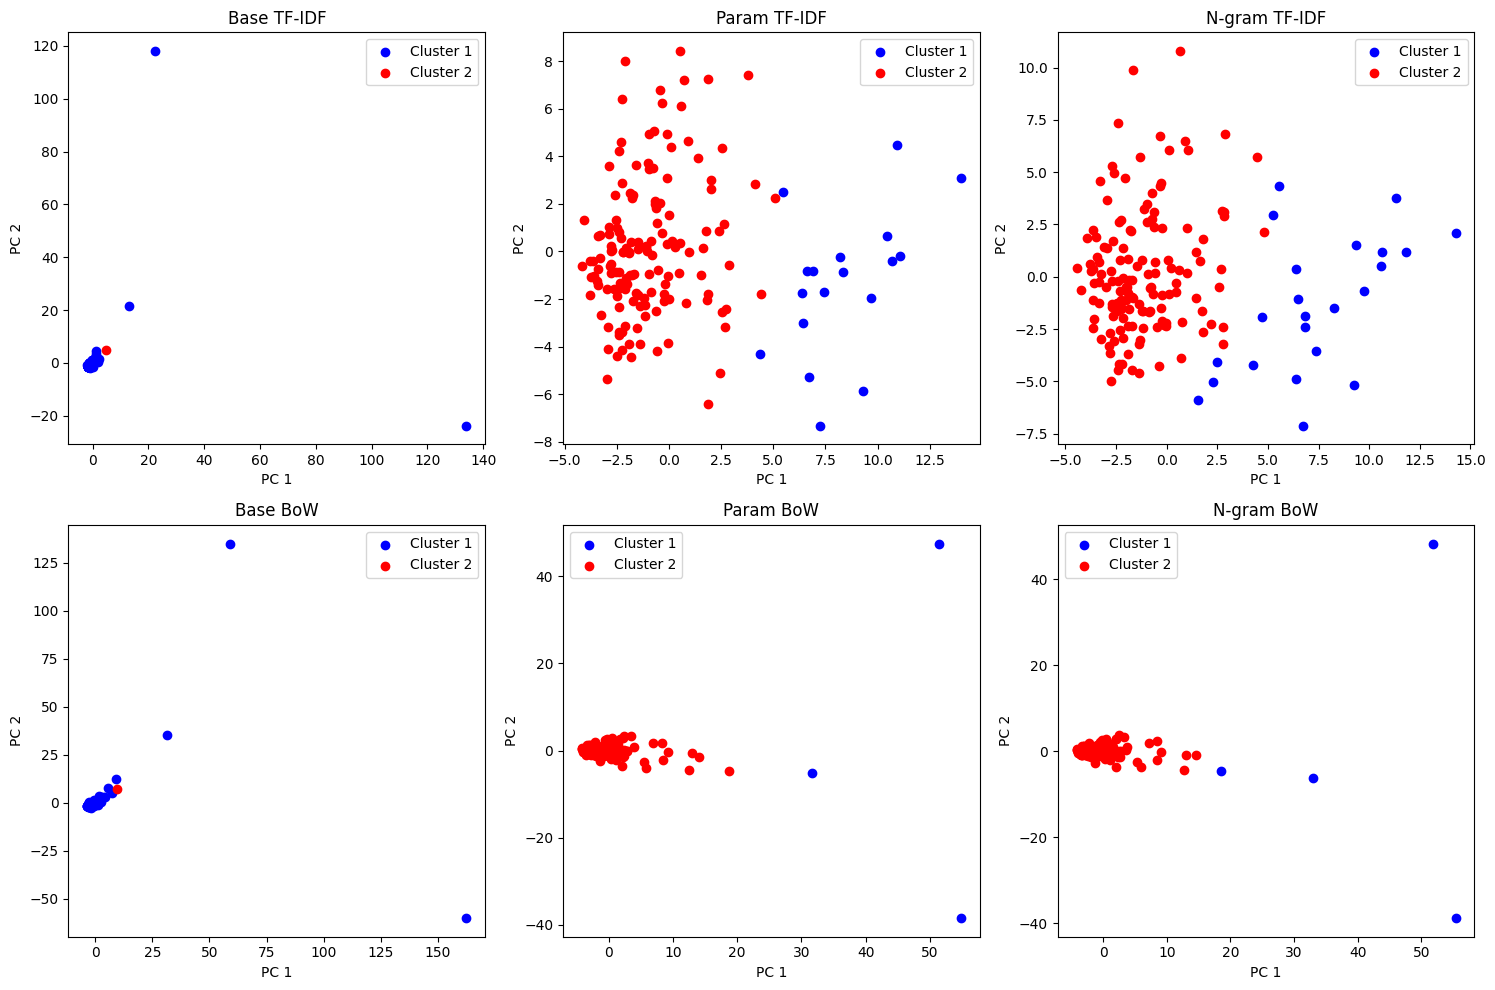

In [ ]:
def pca_plot_cluster(models_data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    colors = ['b', 'r']

    for i, (model_name, xtrain, features) in enumerate(models_data):
        ax = axes[i]
        matrix = pd.DataFrame(xtrain.toarray(), columns=features)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(matrix)

        pca = PCA(n_components=2)
        model_pca = pca.fit_transform(X_scaled)
        df_pca = pd.DataFrame(model_pca, columns=['PC1', 'PC2'])

        kmeans = KMeans(n_clusters=2, random_state=0)
        clusters = kmeans.fit_predict(X_scaled)

        for cluster_id in range(2):
            cluster_points = df_pca[clusters == cluster_id]
            ax.scatter(cluster_points['PC1'], cluster_points['PC2'], color=colors[cluster_id], label=f'Cluster {cluster_id+1}')

        ax.set_title(model_name)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.legend()

    plt.tight_layout()
    plt.show()

models_data = [
    ('Base TF-IDF', X_train_tfidf, tfidf_feature_names_base),
    ('Param TF-IDF', X_train_tfidf_vect, tfidf_feature_names_vect),
    ('N-gram TF-IDF', X_train_tfidf_ngram_vect, tfidf_feature_names_ngram_vect),
    ('Base BoW', X_train_bow_vect_base, bow_feature_names_base),
    ('Param BoW', X_train_bow_vect, bow_feature_names_vect),
    ('N-gram BoW', X_train_bow_ngram_vect, bow_feature_names_ngram_vect)
]

pca_plot_cluster(models_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


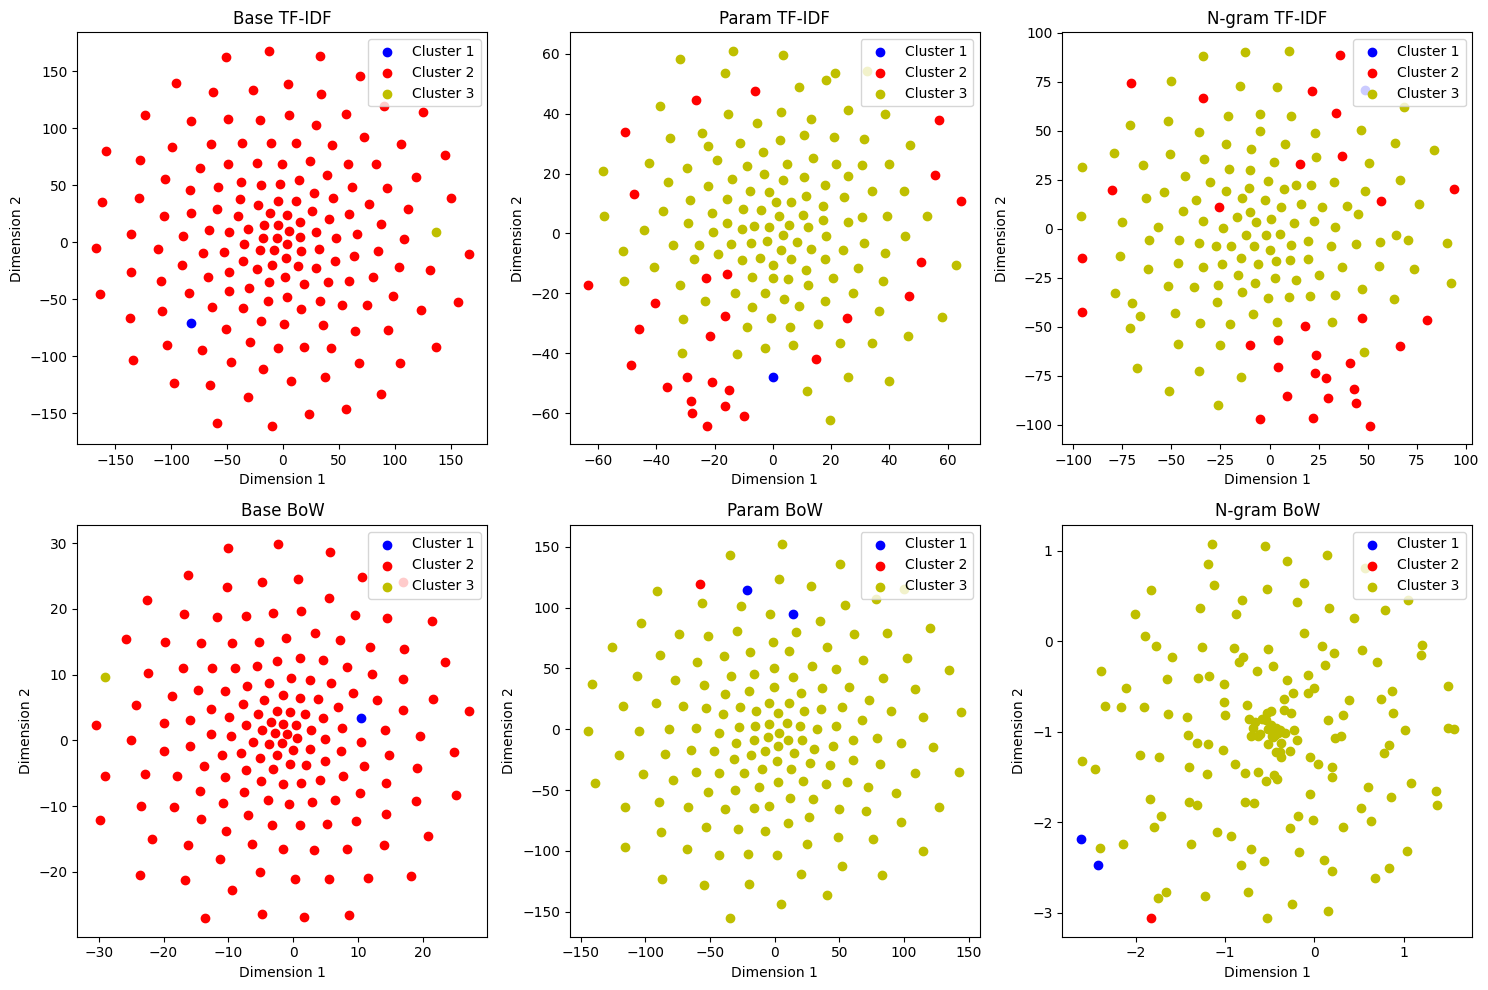

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot_cluster(models_data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    colors = ['b','r', 'y',]

    for i, (model_name, xtrain, features) in enumerate(models_data):
        ax = axes[i]
        matrix = pd.DataFrame(xtrain.toarray(), columns=features)
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(matrix)

        tsne = TSNE(n_components=2, random_state=0)
        model_tsne = tsne.fit_transform(X_scaled)
        df_tsne = pd.DataFrame(model_tsne, columns=['Dimension 1', 'Dimension 2'])

        kmeans = KMeans(n_clusters=3, random_state=0)
        clusters = kmeans.fit_predict(X_scaled)


        for cluster_id in range(3):
            cluster_points = df_tsne[clusters == cluster_id]
            ax.scatter(cluster_points['Dimension 1'], cluster_points['Dimension 2'], color=colors[cluster_id], label=f'Cluster {cluster_id+1}')

        ax.set_title(model_name)
        ax.set_xlabel('Dimension 1')
        ax.set_ylabel('Dimension 2')
        ax.legend()

    plt.tight_layout()
    plt.show()

models_data = [
    ('Base TF-IDF', X_train_tfidf, tfidf_feature_names_base),
    ('Param TF-IDF', X_train_tfidf_vect, tfidf_feature_names_vect),
    ('N-gram TF-IDF', X_train_tfidf_ngram_vect, tfidf_feature_names_ngram_vect),
    ('Base BoW', X_train_bow_vect_base, bow_feature_names_base),
    ('Param BoW', X_train_bow_vect, bow_feature_names_vect),
    ('N-gram BoW', X_train_bow_ngram_vect, bow_feature_names_ngram_vect)
]

tsne_plot_cluster(models_data)

### __2.4 Word2Vec__

#### __2.4.1 Word2Vec - CBOW__

In [ ]:
# Train - test split using tokenized version of data

X_train_tok, X_test_tok, y_train_tok, y_test_tok = train_test_split(data['Lemmatized Review'], data['Positivity'], test_size = 0.20, random_state = 0,stratify = data['Positivity'])

print('X_train shape: ', X_train_tok.shape, '\n')
print('X_test shape: ', X_test_tok.shape, '\n')
print('y_train shape: ',y_train_tok.shape, '\n')
print('y_test shape: ', y_test_tok.shape, '\n')



X_train shape:  (164,) 

X_test shape:  (41,) 

y_train shape:  (164,) 

y_test shape:  (41,) 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# CBOW variations

cbow_base = Word2Vec(sentences=X_train_tok, sg=0)
print('CBOW base without any parameters:\n', cbow_base, '\n')

cbow_param = Word2Vec(sentences=X_train_tok, vector_size=100, min_count=3, epochs=100, sg=0)
print('CBOW with parameters:\n',cbow_param, '\n')

cbow_ngram = Word2Vec(sentences=X_train_tok, vector_size=100, window=5, min_count=3, epochs=100, sg=0)
print('CBOW base with parameters & N-grams:\n',cbow_ngram, '\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CBOW base without any parameters:
 Word2Vec<vocab=628, vector_size=100, alpha=0.025> 

CBOW with parameters:
 Word2Vec<vocab=996, vector_size=100, alpha=0.025> 

CBOW base with parameters & N-grams:
 Word2Vec<vocab=996, vector_size=100, alpha=0.025> 



#### __2.4.2 Word2Vec - Skip-gram__

In [ ]:
# Skip-gram variations

skip_base = Word2Vec(sentences=X_train_tok, sg=1)
print('Skip-gram base without any parameters:\n', skip_base, '\n')

skip_param = Word2Vec(sentences=X_train_tok, vector_size=100, min_count=3, epochs=100, sg=1)
print('Skip-gram with parameters:\n',cbow_param, '\n')

skip_ngram = Word2Vec(sentences=X_train_tok, vector_size=100, window=5, min_count=3, epochs=100, sg=1)
print('Skip-gram base with parameters & N-grams:\n',cbow_ngram, '\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Skip-gram base without any parameters:
 Word2Vec<vocab=628, vector_size=100, alpha=0.025> 

Skip-gram with parameters:
 Word2Vec<vocab=996, vector_size=100, alpha=0.025> 

Skip-gram base with parameters & N-grams:
 Word2Vec<vocab=996, vector_size=100, alpha=0.025> 



### __2.5 N-most similar words & word similarity__

In [ ]:
# Function for n similar words and word similarity

def n_similar_words(modelname, model, word,n):
  try:
    print(modelname, ':')
    vector = model.wv[word]
    similar_words = model.wv.most_similar(word, topn=n)
    print(similar_words, '\n')
  except KeyError:
    print(f"The word '{word}' is not in the vocabulary.")
    return []


def similarity(modelname, model, word1, word2):
  print(modelname, ':')
  similar = model.wv.similarity(word1,word2)
  print(similar, '\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying n_similar_words function on the different CBOW & Skip-gram models

print('-------------------------------------------------------- CBOW --------------------------------------------------------\n')
n_similar_words('base CBOW', cbow_base, 'clean', 5)
n_similar_words('Param CBOW', cbow_param, 'clean', 5)
n_similar_words('N-Gram CBOW', cbow_ngram, 'clean', 5)
print('\n\n------------------------------------------------------ Skip-gram ------------------------------------------------------')
n_similar_words('base Skip-gram', skip_base, 'clean', 5)
n_similar_words('Param Skip-gram', skip_param, 'clean', 5)
n_similar_words('N-Gram Skip-gram', skip_ngram, 'clean', 5)

-------------------------------------------------------- CBOW --------------------------------------------------------

base CBOW :
[('breakfast', 0.9991166591644287), ('great', 0.999007523059845), ('good', 0.99900221824646), ('friendly', 0.9989800453186035), ('bed', 0.9989401698112488)] 

Param CBOW :
[('nicely', 0.7569193840026855), ('comfortable', 0.7359008193016052), ('appoint', 0.7141315937042236), ('spacious', 0.7035204172134399), ('functional', 0.6865419149398804)] 

N-Gram CBOW :
[('nicely', 0.7570512294769287), ('comfortable', 0.7327832579612732), ('appoint', 0.7145402431488037), ('spacious', 0.7040090560913086), ('functional', 0.6869626045227051)] 



------------------------------------------------------ Skip-gram ------------------------------------------------------
base Skip-gram :
[('din', 0.9980595707893372), ('appear', 0.9980359673500061), ('suit', 0.9979627132415771), ('quickly', 0.9979461431503296), ('guy', 0.9979153275489807)] 

Param Skip-gram :
[('comfortable', 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying n_similar_words function on the different CBOW & Skip-gram models

print('-------------------------------------------------------- CBOW --------------------------------------------------------\n')
n_similar_words('base CBOW', cbow_base, 'clean', 10)
n_similar_words('Param CBOW', cbow_param, 'clean', 10)
n_similar_words('N-Gram CBOW', cbow_ngram, 'clean', 10)
print('\n\n------------------------------------------------------ Skip-gram ------------------------------------------------------')
n_similar_words('base Skip-gram', skip_base, 'clean', 10)
n_similar_words('Param Skip-gram', skip_param, 'clean', 10)
n_similar_words('N-Gram Skip-gram', skip_ngram, 'clean', 10)

-------------------------------------------------------- CBOW --------------------------------------------------------

base CBOW :
[('breakfast', 0.9991166591644287), ('great', 0.999007523059845), ('good', 0.99900221824646), ('friendly', 0.9989800453186035), ('bed', 0.9989401698112488), ('offer', 0.998916745185852), ('beach', 0.9989079236984253), ('say', 0.9988911151885986), ('lot', 0.9988610148429871), ('pool', 0.9988459944725037)] 

Param CBOW :
[('nicely', 0.7569193840026855), ('comfortable', 0.7359008193016052), ('appoint', 0.7141315937042236), ('spacious', 0.7035204172134399), ('functional', 0.6865419149398804), ('shape', 0.6233373880386353), ('efficient', 0.6093634366989136), ('furnish', 0.6087803244590759), ('nice', 0.6073469519615173), ('touch', 0.5971187949180603)] 

N-Gram CBOW :
[('nicely', 0.7570512294769287), ('comfortable', 0.7327832579612732), ('appoint', 0.7145402431488037), ('spacious', 0.7040090560913086), ('functional', 0.6869626045227051), ('shape', 0.6235338449478

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying n_similar_words function on the different CBOW & Skip-gram models

print('-------------------------------------------------------- CBOW --------------------------------------------------------\n')
n_similar_words('base CBOW', cbow_base, 'bedroom', 5)
n_similar_words('Param CBOW', cbow_param, 'bedroom', 5)
n_similar_words('N-Gram CBOW', cbow_ngram, 'bedroom', 5)
print('\n\n------------------------------------------------------ Skip-gram ------------------------------------------------------')
n_similar_words('base Skip-gram', skip_base, 'bedroom', 5)
n_similar_words('Param Skip-gram', skip_param, 'bedroom', 5)
n_similar_words('N-Gram Skip-gram', skip_ngram, 'bedroom', 5)

-------------------------------------------------------- CBOW --------------------------------------------------------

base CBOW :
[('price', 0.992954671382904), ('go', 0.9928267598152161), ('help', 0.9928185939788818), ('offer', 0.9927436709403992), ('good', 0.9926955103874207)] 

Param CBOW :
[('mirror', 0.7729039788246155), ('tile', 0.7684056162834167), ('bath', 0.7373619675636292), ('light', 0.7104345560073853), ('space', 0.7099015116691589)] 

N-Gram CBOW :
[('mirror', 0.7730965614318848), ('tile', 0.7682058811187744), ('bath', 0.7368694543838501), ('light', 0.7116255760192871), ('space', 0.7099758982658386)] 



------------------------------------------------------ Skip-gram ------------------------------------------------------
base Skip-gram :
[('able', 0.9984084367752075), ('regular', 0.9984071254730225), ('reason', 0.9983415603637695), ('change', 0.9983159303665161), ('lift', 0.9983108639717102)] 

Param Skip-gram :
[('super', 0.5592439770698547), ('tile', 0.532107889652252

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying n_similar_words function on the different CBOW & Skip-gram models

print('-------------------------------------------------------- CBOW --------------------------------------------------------\n')
n_similar_words('base CBOW', cbow_base, 'bedroom', 10)
n_similar_words('Param CBOW', cbow_param, 'bedroom', 10)
n_similar_words('N-Gram CBOW', cbow_ngram, 'bedroom', 10)
print('\n\n------------------------------------------------------ Skip-gram ------------------------------------------------------')
n_similar_words('base Skip-gram', skip_base, 'bedroom', 10)
n_similar_words('Param Skip-gram', skip_param, 'bedroom', 10)
n_similar_words('N-Gram Skip-gram', skip_ngram, 'bedroom', 10)

-------------------------------------------------------- CBOW --------------------------------------------------------

base CBOW :
[('price', 0.992954671382904), ('go', 0.9928267598152161), ('help', 0.9928185939788818), ('offer', 0.9927436709403992), ('good', 0.9926955103874207), ('minute', 0.9926936030387878), ('tourist', 0.9926926493644714), ('beach', 0.9926464557647705), ('say', 0.9926387667655945), ('floor', 0.9925774931907654)] 

Param CBOW :
[('mirror', 0.7729039788246155), ('tile', 0.7684056162834167), ('bath', 0.7373619675636292), ('light', 0.7104345560073853), ('space', 0.7099015116691589), ('straight', 0.677788496017456), ('separate', 0.6708166599273682), ('bathroom', 0.6649855971336365), ('shower', 0.6482684016227722), ('wear', 0.6445841193199158)] 

N-Gram CBOW :
[('mirror', 0.7730965614318848), ('tile', 0.7682058811187744), ('bath', 0.7368694543838501), ('light', 0.7116255760192871), ('space', 0.7099758982658386), ('straight', 0.6774988770484924), ('separate', 0.669951260

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying similarity function on the different CBOW & Skip-gram models

print('-------------------------------------------------------- CBOW --------------------------------------------------------\n')
similarity('base CBOW', cbow_base, 'bedroom', 'clean')
similarity('Param CBOW', cbow_param, 'bedroom', 'clean')
similarity('N-Gram CBOW', cbow_ngram, 'bedroom', 'clean')
print('\n\n------------------------------------------------------ Skip-gram ------------------------------------------------------')
similarity('base Skip-gram', skip_base, 'bedroom', 'clean')
similarity('Param Skip-gram', skip_param, 'bedroom', 'clean')
similarity('N-Gram Skip-gram', skip_ngram, 'bedroom', 'clean')

-------------------------------------------------------- CBOW --------------------------------------------------------

base CBOW :
0.9916995 

Param CBOW :
0.4280461 

N-Gram CBOW :
0.42873862 



------------------------------------------------------ Skip-gram ------------------------------------------------------
base Skip-gram :
0.99728274 

Param Skip-gram :
0.18305892 

N-Gram Skip-gram :
0.18926194 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying similarity function on the different CBOW & Skip-gram models

print('-------------------------------------------------------- CBOW --------------------------------------------------------\n')
similarity('base CBOW', cbow_base, 'bedroom', 'bathroom')
similarity('Param CBOW', cbow_param, 'bedroom', 'bathroom')
similarity('N-Gram CBOW', cbow_ngram, 'bedroom', 'bathroom')
print('\n\n------------------------------------------------------ Skip-gram ------------------------------------------------------')
similarity('base Skip-gram', skip_base, 'bedroom', 'bathroom')
similarity('Param Skip-gram', skip_param, 'bedroom', 'bathroom')
similarity('N-Gram Skip-gram', skip_ngram, 'bedroom', 'bathroom')

-------------------------------------------------------- CBOW --------------------------------------------------------

base CBOW :
0.99221045 

Param CBOW :
0.6649856 

N-Gram CBOW :
0.66446483 



------------------------------------------------------ Skip-gram ------------------------------------------------------
base Skip-gram :
0.9973864 

Param Skip-gram :
0.3197905 

N-Gram Skip-gram :
0.3189403 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creating a table that displays all different models and the n-most similar words they produce for specific words

words = ['clean', 'bathroom', 'business', 'area', 'breakfast']

sim_table = pd.DataFrame(columns=['Model', 'N'])
for word in words:
  sim_table[f'{word}']=[]

models = {'CBOW': cbow_base, 'CBOW Param': cbow_param, 'CBOW N-gram': cbow_ngram, 'SkipGram': skip_base, 'SkipGram Param': skip_param, 'SkipGram N-gram': skip_ngram}
num = [5, 10]

for model_key, model_value in models.items():
  for n in num:
    for word in words:
      try:
        vector = model_value.wv[word]
        similar_words = model_value.wv.most_similar(word, topn=n)
        rounded_similar_words = [(word, round(score, 3)) for word, score in similar_words]


        row = pd.DataFrame({
            'Model': [model_key],
            'N': [n],
            f'{word}': [rounded_similar_words],
        })

        sim_table = pd.concat([sim_table, row], ignore_index=True)
      except KeyError:
        print(f"The word '{word}' is not in the vocabulary.")

sim_table_aggr = sim_table.groupby(['Model', 'N']).agg(lambda x: list(x.dropna())).reset_index()
pd.set_option('display.max_colwidth', None)


sim_table_aggr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model   N  \
0              CBOW   5   
1              CBOW  10   
2       CBOW N-gram   5   
3       CBOW N-gram  10   
4        CBOW Param   5   
5        CBOW Param  10   
6          SkipGram   5   
7          SkipGram  10   
8   SkipGram N-gram   5   
9   SkipGram N-gram  10   
10   SkipGram Param   5   
11   SkipGram Param  10   

                                                                                                                                                                                             clean  \
0                                                                                                           [[(breakfast, 0.999), (great, 0.999), (good, 0.999), (friendly, 0.999), (bed, 0.999)]]   
1                                [[(breakfast, 0.999), (great, 0.999), (good, 0.999), (friendly, 0.999), (bed, 0.999), (offer, 0.999), (beach, 0.999), (say, 0.999), (lot, 0.999), (pool, 0.999)]]   
2                                                                                              [[(nicely, 0.757), (comfortable, 0.733), (appoint, 0.715), (spacious, 0.704), (functional, 0.687)]]   
3          [[(nicely, 0.757), (comfortable, 0.733), (appoint, 0.715), (spacious, 0.704), (functional, 0.687), (shape, 0.624), (efficient, 0.61), (furnish, 0.608), (nice, 0.605), (touch, 0.597)]]   
4                                                                                              [[(nicely, 0.757), (comfortable, 0.736), (appoint, 0.714), (spacious, 0.704), (functional, 0.687)]]   
5         [[(nicely, 0.757), (comfortable, 0.736), (appoint, 0.714), (spacious, 0.704), (functional, 0.687), (shape, 0.623), (efficient, 0.609), (furnish, 0.609), (nice, 0.607), (touch, 0.597)]]   
6                                                                                                                 [[(din, 0.998), (appear, 0.998), (suit, 0.998), (quickly, 0.998), (guy, 0.998)]]   
7                          [[(din, 0.998), (appear, 0.998), (suit, 0.998), (quickly, 0.998), (guy, 0.998), (entire, 0.998), (expectation, 0.998), (change, 0.998), (flight, 0.998), (age, 0.998)]]   
8                                                                                             [[(comfortable, 0.437), (spacious, 0.407), (friendly, 0.401), (perfectly, 0.392), (appoint, 0.387)]]   
9   [[(comfortable, 0.437), (spacious, 0.407), (friendly, 0.401), (perfectly, 0.392), (appoint, 0.387), (great, 0.376), (courteous, 0.374), (nicely, 0.367), (thoroughly, 0.358), (eager, 0.354)]]   
10                                                                                                [[(comfortable, 0.439), (spacious, 0.411), (friendly, 0.395), (appoint, 0.388), (great, 0.387)]]   
11  [[(comfortable, 0.439), (spacious, 0.411), (friendly, 0.395), (appoint, 0.388), (great, 0.387), (perfectly, 0.381), (courteous, 0.369), (nicely, 0.365), (thoroughly, 0.357), (eager, 0.353)]]   

                                                                                                                                                                        bathroom  \
0                                                                                            [[(beach, 0.999), (good, 0.999), (great, 0.999), (breakfast, 0.999), (lot, 0.999)]]   
1               [[(beach, 0.999), (good, 0.999), (great, 0.999), (breakfast, 0.999), (lot, 0.999), (need, 0.999), (look, 0.999), (say, 0.999), (friendly, 0.999), (use, 0.999)]]   
2                                                                                              [[(tile, 0.862), (sink, 0.804), (contain, 0.785), (ant, 0.785), (mirror, 0.779)]]   
3    [[(tile, 0.862), (sink, 0.804), (contain, 0.785), (ant, 0.785), (mirror, 0.779), (toilet, 0.742), (nicer, 0.726), (tiny, 0.726), (maintenance, 0.709), (efficient, 0.706)]]   
4                                                                                              [[(tile, 0.862), (sink, 0.804), (contain, 0.785), (ant, 0.785), (mirror, 0.779)]]   
5    [[

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


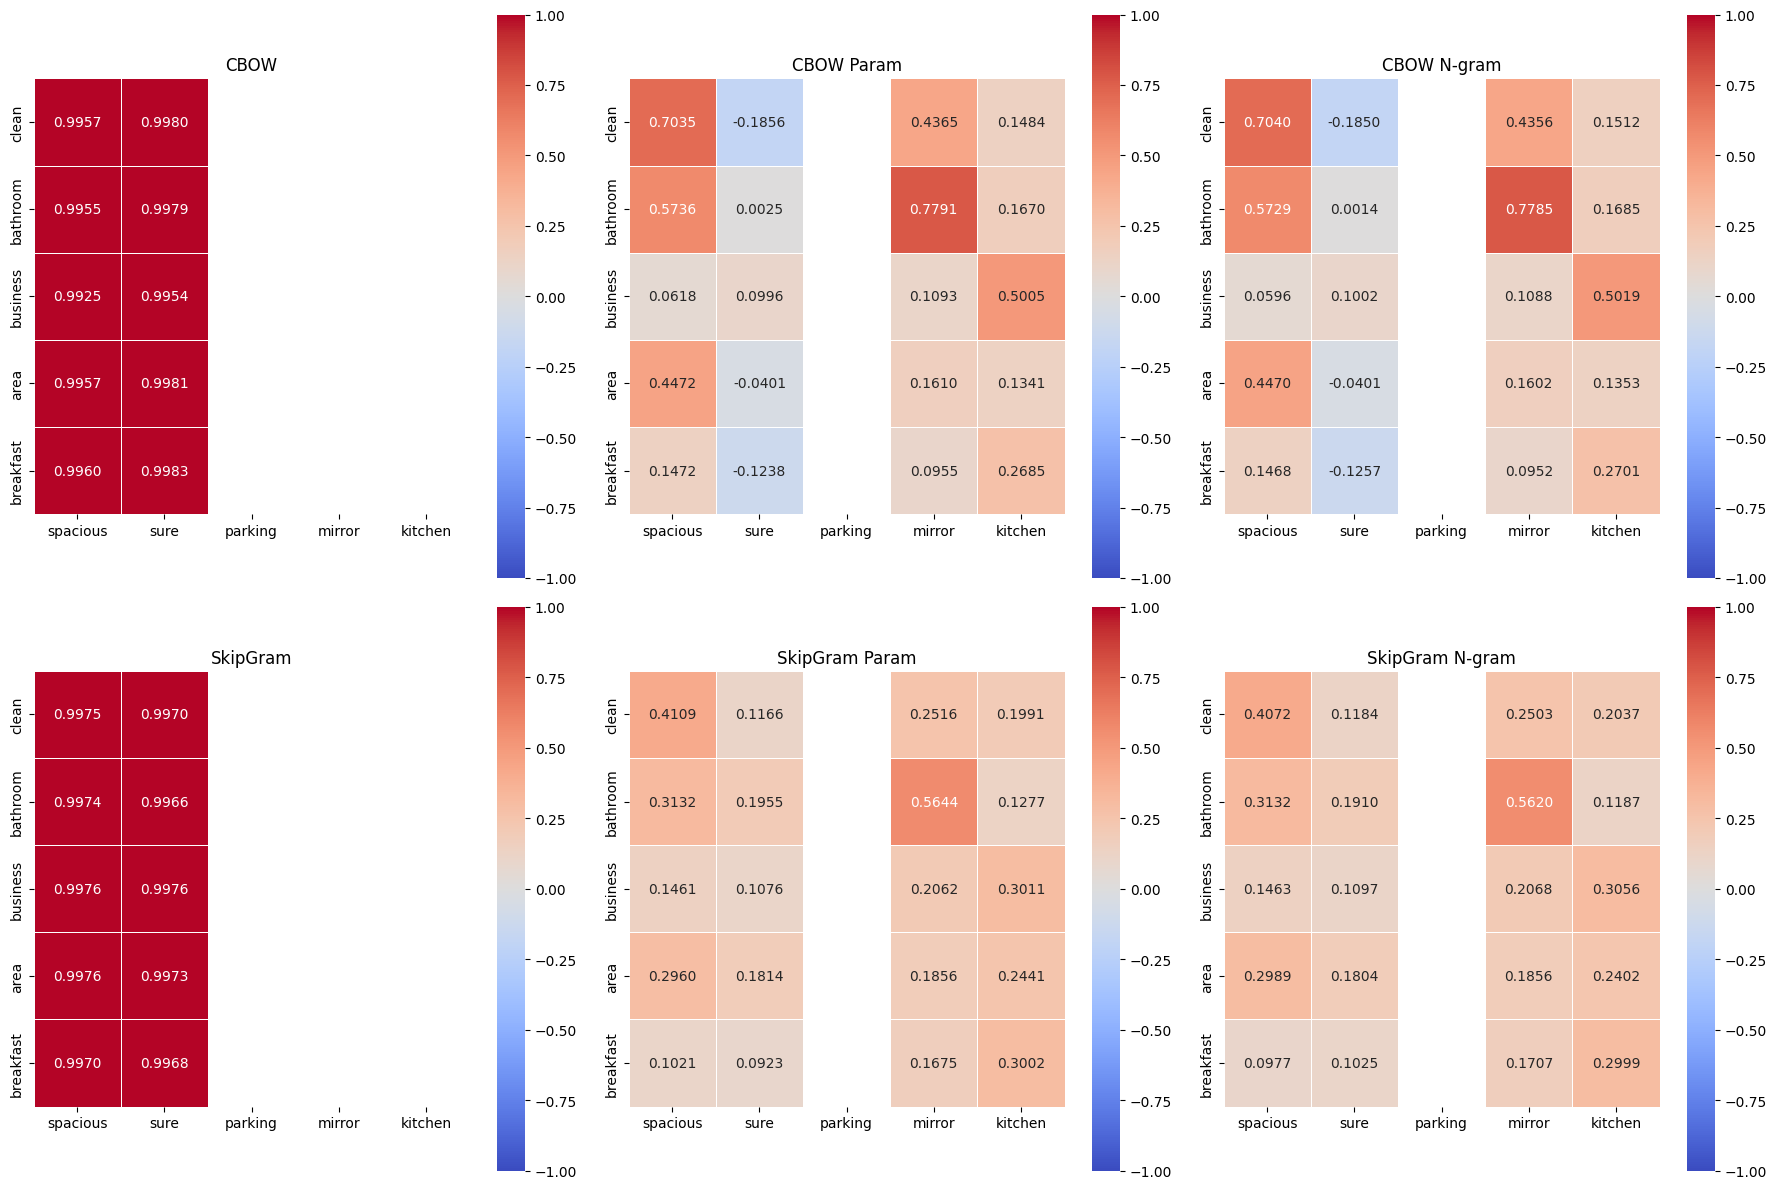

In [ ]:
# Multiple heatmap plotting to show how each Word2Vec model classifies similarity between given lists of words

words_set1 = ['clean', 'bathroom', 'business', 'area', 'breakfast']
words_set2 = ['spacious', 'sure', 'parking', 'mirror', 'kitchen']

models = {'CBOW': cbow_base, 'CBOW Param': cbow_param, 'CBOW N-gram': cbow_ngram, 'SkipGram': skip_base, 'SkipGram Param': skip_param, 'SkipGram N-gram': skip_ngram}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    sim_matrix = np.zeros((len(words_set1), len(words_set2)))

    for i, word1 in enumerate(words_set1):
        for j, word2 in enumerate(words_set2):
            try:
                similarity = model.wv.similarity(word1, word2)
                sim_matrix[i, j] = similarity
            except KeyError:
                sim_matrix[i, j] = np.nan

    sim_df = pd.DataFrame(sim_matrix, index=words_set1, columns=words_set2)

    sns.heatmap(sim_df, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1,
                square=True, linewidths=.5, fmt='.4f', ax=axes[idx])
    axes[idx].set_title(model_name)

plt.tight_layout()
plt.show()


# 'mirror' & 'kitchen' do not have any similarity values between other words in the CBOW & SkipGram base models because they are not even in their respective vocabulary

In [ ]:
def get_avg_word_vectors(model, data):
    vectors = []
    for sentence in data:
        words = [word for word in sentence if word in model.wv]
        if words:
            vectors.append(np.mean(model.wv[words], axis=0))
        else:
            vectors.append(np.zeros(model.vector_size))
    return np.array(vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


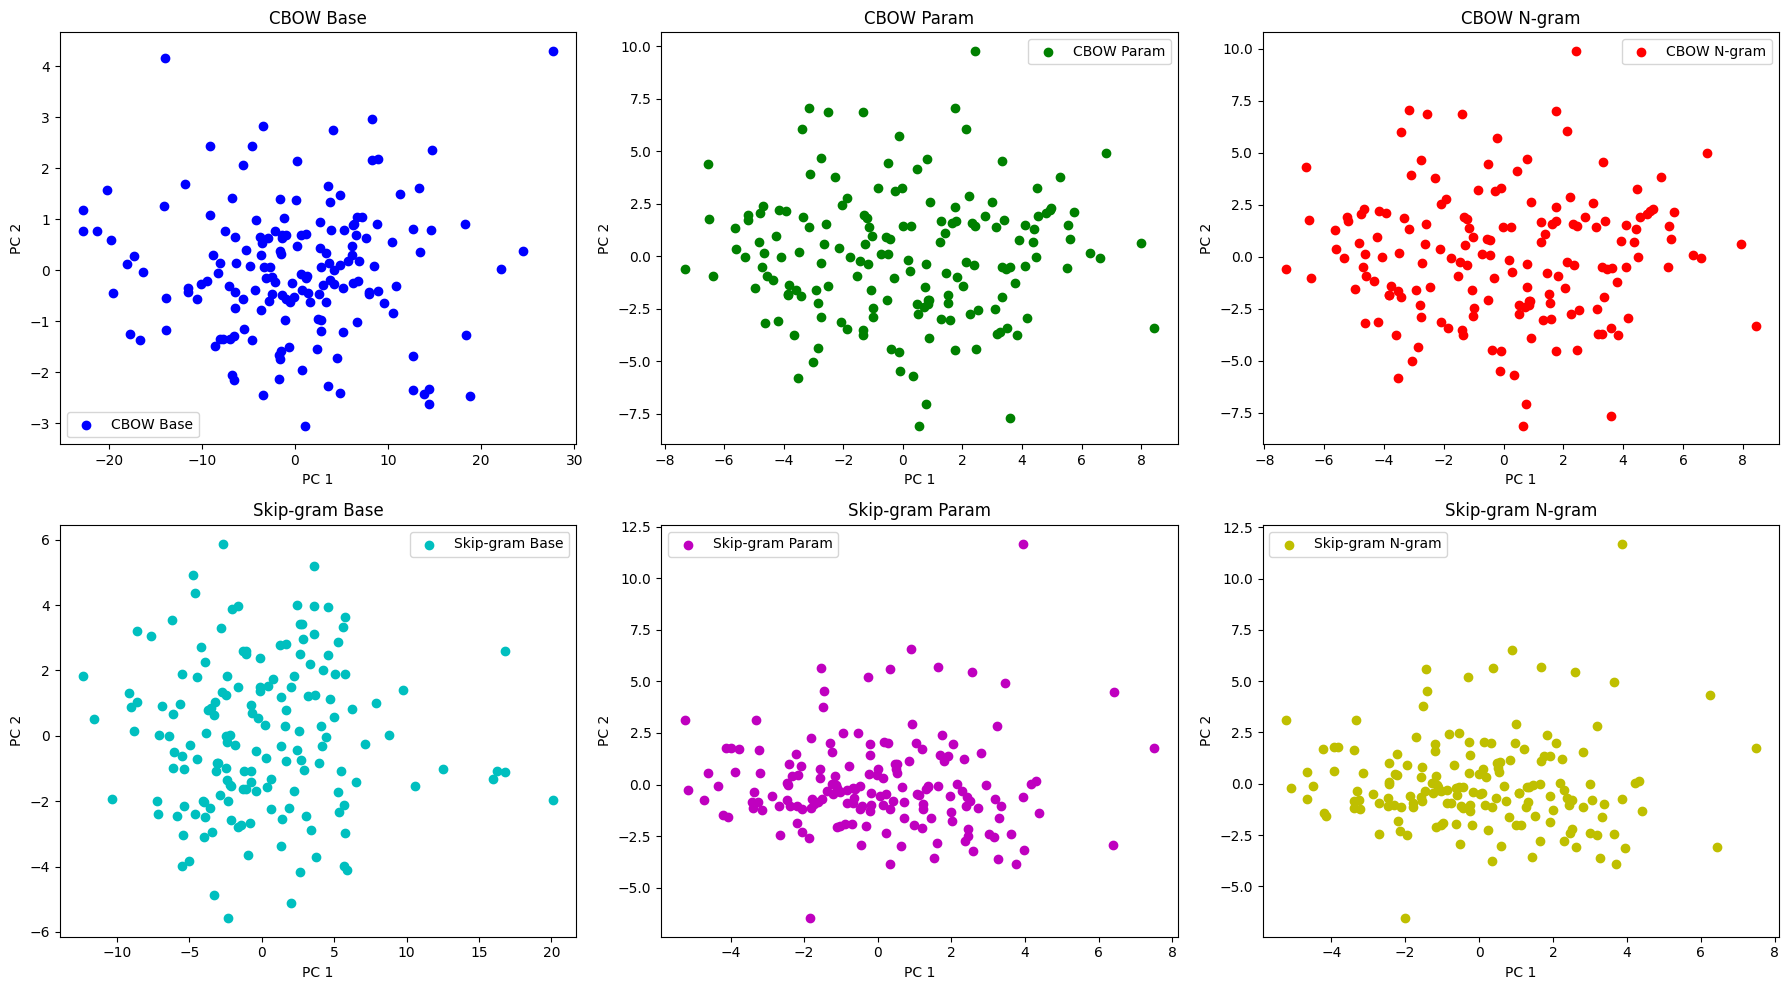

In [ ]:
def get_sentence_vectors(model, sentences):
    return np.array([np.mean([model.wv[word] for word in sentence if word in model.wv] or [np.zeros(model.vector_size)], axis=0) for sentence in sentences])


# PCA Plot for Word2Vec Models
def pca_plot_word2vec(word2vec_data):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    colors = ['b', 'g', 'r', 'c', 'm', 'y']

    for i, (model_name, xtrain) in enumerate(word2vec_data):
        ax = axes[i]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(xtrain)

        pca = PCA(n_components=2)
        model_pca = pca.fit_transform(X_scaled)
        df_pca = pd.DataFrame(model_pca, columns=['PC1', 'PC2'])

        ax.scatter(df_pca['PC1'], df_pca['PC2'], color=colors[i], label=model_name)
        ax.set_title(model_name)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.legend()

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Prepare Word2Vec data
cbow_base_vectors = get_sentence_vectors(cbow_base, X_train_tok)
cbow_param_vectors = get_sentence_vectors(cbow_param, X_train_tok)
cbow_ngram_vectors = get_sentence_vectors(cbow_ngram, X_train_tok)

skip_base_vectors = get_sentence_vectors(skip_base, X_train_tok)
skip_param_vectors = get_sentence_vectors(skip_param, X_train_tok)
skip_ngram_vectors = get_sentence_vectors(skip_ngram, X_train_tok)

# Prepare data for visualization
word2vec_data = [
    ('CBOW Base', cbow_base_vectors),
    ('CBOW Param', cbow_param_vectors),
    ('CBOW N-gram', cbow_ngram_vectors),
    ('Skip-gram Base', skip_base_vectors),
    ('Skip-gram Param', skip_param_vectors),
    ('Skip-gram N-gram', skip_ngram_vectors)
]

# Visualize using PCA
pca_plot_word2vec(word2vec_data)

In [ ]:
# TSNE

tsne_model = TSNE(n_components=2, random_state=0)
tsne_embeddings = tsne_model.fit_transform(word2vec_data)

tsne_df = pd.DataFrame(tsne_embeddings, columns=['x', 'y'])

tsne_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'list' object has no attribute 'shape'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


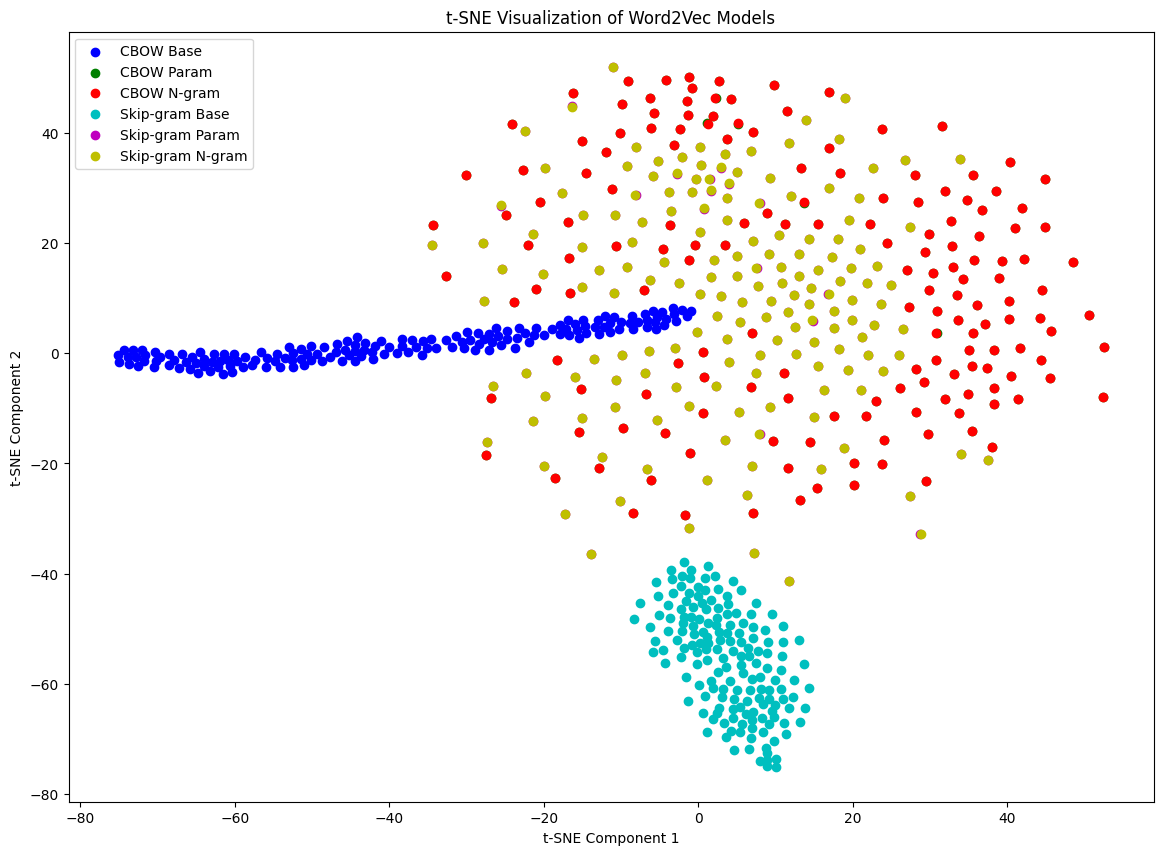

In [ ]:
from sklearn.manifold import TSNE

# Word2Vec vectors into a single array
all_vectors = np.concatenate([vectors for _, vectors in word2vec_data])

# t-SNE
tsne_model = TSNE(n_components=2, random_state=0)
tsne_emb = tsne_model.fit_transform(all_vectors)

# DataFrame
tsne_df = pd.DataFrame(tsne_emb, columns=['x', 'y'])

# Add labels for each model to the DataFrame
model_labels = []
for model_name, vectors in word2vec_data:
    model_labels.extend([model_name] * len(vectors))
tsne_df['model'] = model_labels

# Plot the t-SNE results
plt.figure(figsize=(14, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

for i, (model_name, _) in enumerate(word2vec_data):
    subset = tsne_df[tsne_df['model'] == model_name]
    plt.scatter(subset['x'], subset['y'], color=colors[i], label=model_name)

plt.title('t-SNE Visualization of Word2Vec Models')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


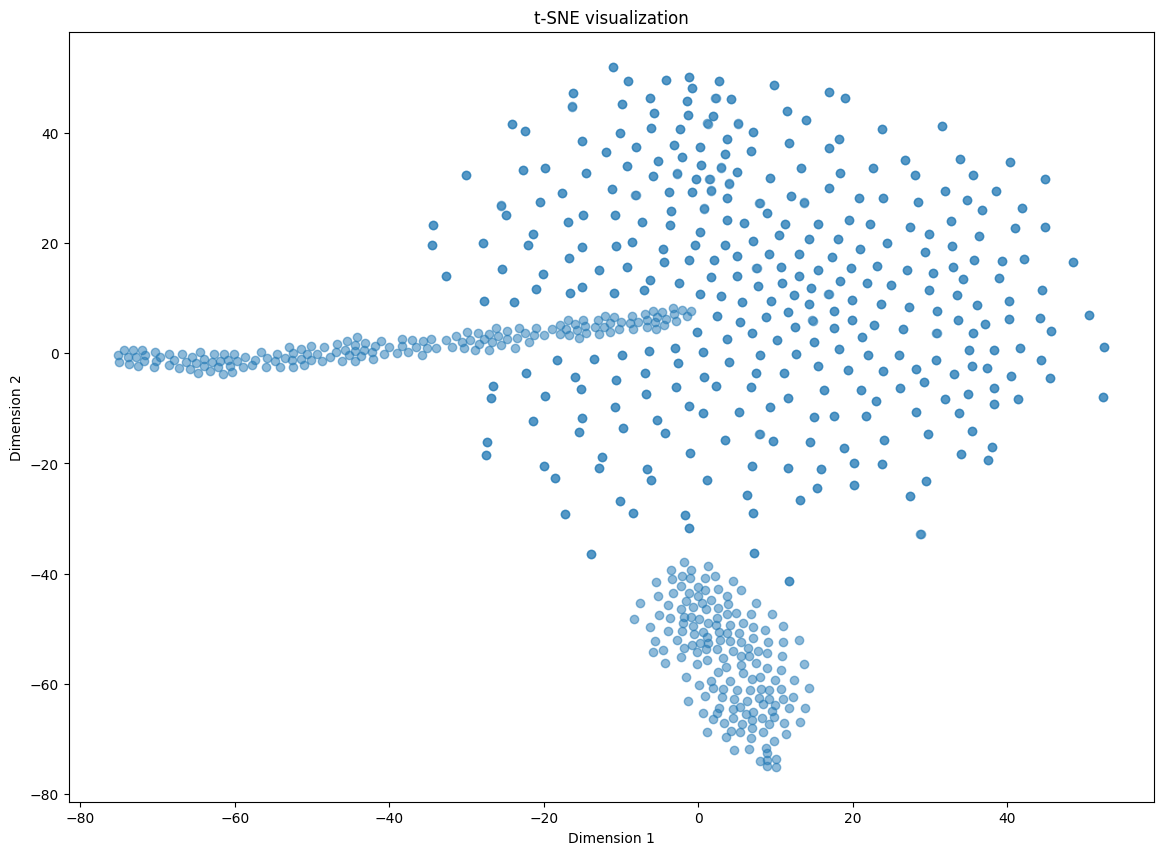

In [ ]:
# Plotting the t-SNE results

plt.figure(figsize=(14, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
plt.scatter(tsne_df['x'], tsne_df['y'], alpha=0.5)
plt.title('t-SNE visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

### __2.6 Embedding tecniques comparison__

In [ ]:
# Generate t-SNE for TF-IDF
tfidf_tsne = tsne_model.fit_transform(X_train_tfidf.toarray())

# Generate t-SNE for BoW
b_tsne = tsne_model.fit_transform(X_train_vectorized.toarray())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'X_train_vectorized' is not defined

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(b_tsne[:, 0], b_tsne[:, 1], alpha=0.5, color='blue')
ax[0].set_title('t-SNE visualization: BoW embeddings')
ax[0].set_xlabel('Dim 1')
ax[0].set_ylabel('Dim 2')

ax[1].scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], alpha=0.5, color='green')
ax[1].set_title('t-SNE visualization: TF-IDF embeddings')
ax[1].set_xlabel('Dim 1')
ax[1].set_ylabel('Dim 2')

plt.show()

### __2.7 Visualizations__

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


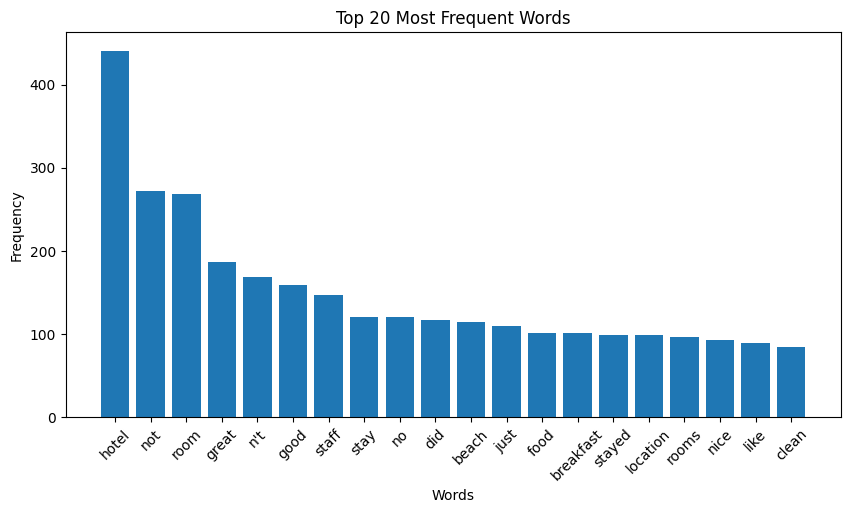

In [ ]:
words = ' '.join(data['Review']).split()
# Count the frequency of each word
word_freq = Counter(words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Separate the words and their frequencies for plotting
words, frequencies = zip(*common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# __3. Model Building__

### __3.1 LDA__

#### __3.1.1 LDA base model__

In [ ]:
# Converting elements of data's 'Lemmatized Review' into a list and then into unique integer IDs

lda_data = data['Lemmatized Review'].values.tolist()
print('Preprocessed words/tokens:\n', lda_data[:1][0][:30],'\n\n')

id2word = corpora.Dictionary(lda_data)
texts = lda_data
corpus = [id2word.doc2bow(text) for text in texts]
print("Dictionary words/tokens' unique integer IDs:\n",corpus[:1][0][:30])

Preprocessed words/tokens:
 ['interest', 'experience', 'check', 'small', 'wait', 'quickly', 'process', 'arrive', 'fruit', 'contain', 'moldy', 'fruit', 'really', 'good', 'start', 'leave', 'note', 'housekeep', 'replace', 'fruit', 'fresh', 'produce', 'donate', 'buffet', 'think', 'good', 'chef', 'large', 'range', 'select'] 


Dictionary words/tokens' unique integer IDs:
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# LDA base

num_topics_base = 5
lda_model_base = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics_base)

print('-------------------------------------------------- LDA BASE --------------------------------------------------\n\n')
for idx, topic in lda_model_base.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


-------------------------------------------------- LDA BASE --------------------------------------------------


Topic: 0 
Words: 0.011*"good" + 0.007*"place" + 0.007*"say" + 0.006*"great" + 0.006*"clean" + 0.006*"walk" + 0.006*"breakfast" + 0.006*"small" + 0.005*"nice" + 0.005*"book"


Topic: 1 
Words: 0.017*"good" + 0.014*"great" + 0.007*"time" + 0.006*"beach" + 0.006*"breakfast" + 0.006*"get" + 0.005*"nice" + 0.005*"pool" + 0.005*"look" + 0.005*"clean"


Topic: 2 
Words: 0.007*"good" + 0.007*"great" + 0.007*"breakfast" + 0.006*"time" + 0.006*"place" + 0.006*"nice" + 0.006*"recommend" + 0.005*"beach" + 0.005*"thing" + 0.005*"pool"


Topic: 3 
Words: 0.014*"good" + 0.014*"great" + 0.009*"nice" + 0.008*"clean" + 0.007*"breakfast" + 0.007*"time" + 0.006*"walk" + 0.005*"place" + 0.005*"go" + 0.005*"bed"


Topic: 4 
Words: 0.014*"great" + 0.009*"good" + 0.008*"walk" + 0.007*"place" + 0.006*"time" + 0.006*"clean" + 0.006*"go" + 0.005*"bathroom" + 0.005*"view" + 0.005*"pool"




#### __3.1.2 LDA optimized model__

In [ ]:
# Function creation and calling through which we identify the number of topics for generating the highest coherence score possible

def topic_coh(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = topic_coh(dictionary=id2word, corpus=corpus, texts=lda_data, start=2, limit=20, step=2)

print('Testing which number of topics yields the highest coherence score, given parameters; passes=10 & iterations=100 \n\n')

for m, cv in zip(range(2, 20, 2), coherence_values):
    print('Number of topics =', m, ' has Coherence Value of', round(cv, 4), '\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Testing which number of topics yields the highest coherence score, given parameters; passes=10 & iterations=100 


Number of topics = 2  has Coherence Value of 0.254 

Number of topics = 4  has Coherence Value of 0.3036 

Number of topics = 6  has Coherence Value of 0.3024 

Number of topics = 8  has Coherence Value of 0.2655 

Number of topics = 10  has Coherence Value of 0.2682 

Number of topics = 12  has Coherence Value of 0.2802 

Number of topics = 14  has Coherence Value of 0.2681 

Number of topics = 16  has Coherence Value of 0.2926 

Number of topics = 18  has Coherence Value of 0.2926 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


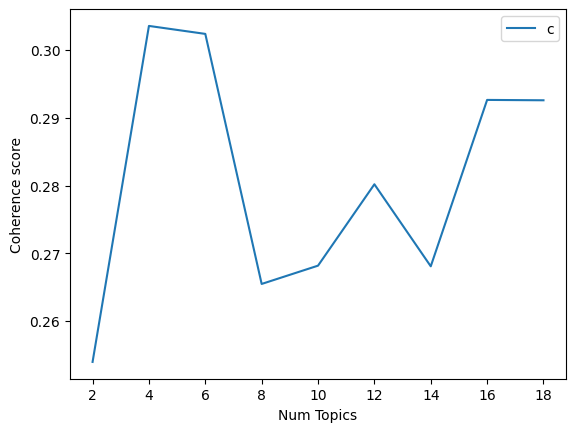

In [ ]:
# Plot the coherence values

limit=20; start=2; step=2;
x = range(start, limit, step)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Function creation and calling through which we identify the number of topics, passes & iterations for generating the highest coherence score possible

def topic_coh_opt(dictionary, corpus, texts, limit, start=2, step=3, passes_list=[5, 10], iterations_list=[50, 100]):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        for passes in passes_list:
            for iterations in iterations_list:
                model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, iterations=iterations)
                model_list.append(model)
                coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
                coherence_values.append((num_topics, passes, iterations, coherencemodel.get_coherence()))
    return model_list, coherence_values

passes_list = [5, 10, 15]
iterations_list = [50, 100, 150]
model_list, coherence_values = topic_coh_opt(dictionary=id2word, corpus=corpus, texts=lda_data, start=2, limit=20, step=3, passes_list=passes_list, iterations_list=iterations_list)

opt_model_idx = np.argmax([cv[3] for cv in coherence_values])
opt_model_params = coherence_values[opt_model_idx][:3]

parameters = ['Number of topics', 'Number of passes', 'Number of iterations']

print("Optimum model: ")
for i in range(3):
  print(parameters[i], ': ', opt_model_params[i])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimum model: 
Number of topics :  2
Number of passes :  15
Number of iterations :  50


In [ ]:
# LDA optimized

num_topics, passes, iterations = opt_model_params

lda_model_opt = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       passes=passes,
                                       iterations=iterations)

print('-------------------------------------------------- LDA OPTIMIZED --------------------------------------------------\n\n')
for idx, topic in lda_model_opt.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------------------------------------------------- LDA OPTIMIZED --------------------------------------------------


Topic: 0 
Words: 0.016*"good" + 0.011*"great" + 0.007*"time" + 0.007*"pool" + 0.007*"walk" + 0.006*"place" + 0.006*"go" + 0.006*"nice" + 0.006*"clean" + 0.006*"beach"


Topic: 1 
Words: 0.012*"great" + 0.008*"breakfast" + 0.008*"good" + 0.006*"clean" + 0.006*"nice" + 0.006*"time" + 0.006*"recommend" + 0.006*"friendly" + 0.005*"place" + 0.005*"review"




#### __3.1.3 LDA base vs optimized model__


In [ ]:
# Comparing coherence of base and optimized LDA models

print('-------------------------------------------------- LDA BASE COHERENCE --------------------------------------------------\n\n')
coherence_lda_base = CoherenceModel(model=lda_model_base, texts=lda_data, dictionary=id2word, coherence='c_v')
coherence_lda_base = coherence_lda_base.get_coherence()
print('LDA base coherence score: ', coherence_lda_base)


print('-------------------------------------------------- LDA OPTIMIZED COHERENCE --------------------------------------------------\n\n')
coherence_lda_param = CoherenceModel(model=lda_model_opt, texts=lda_data, dictionary=id2word, coherence='c_v')
coherence_lda_param = coherence_lda_param.get_coherence()
print('LDA optimized coherence score: ', coherence_lda_param)

-------------------------------------------------- LDA BASE COHERENCE --------------------------------------------------




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA base coherence score:  0.29019618425066446
-------------------------------------------------- LDA OPTIMIZED COHERENCE --------------------------------------------------


LDA optimized coherence score:  0.2981767980198286


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------------------------------------------------- LDA BASE WORDCLOUD/TOPIC--------------------------------------------------




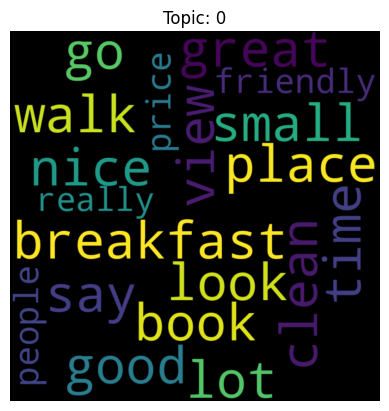

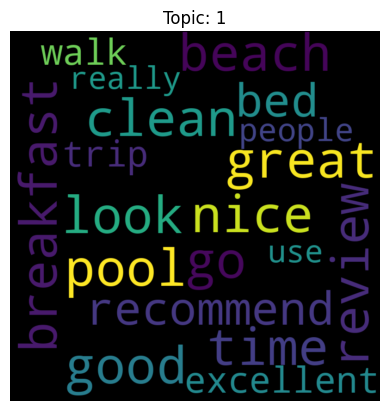

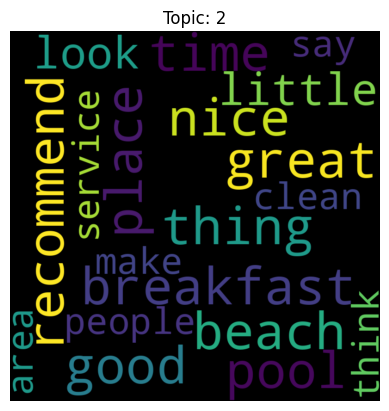

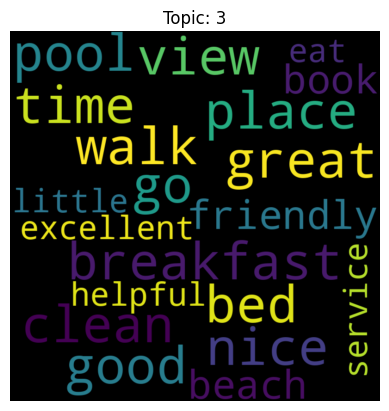

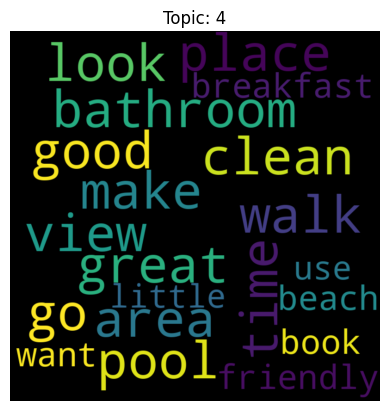

In [ ]:
# LDA base WordCloud

print('-------------------------------------------------- LDA BASE WORDCLOUD/TOPIC--------------------------------------------------\n\n')
for topic_id, topic in enumerate(lda_model_base.print_topics(num_topics=num_topics_base, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------------------------------------------------- LDA OPTIMIZED WORDCLOUD/TOPIC--------------------------------------------------




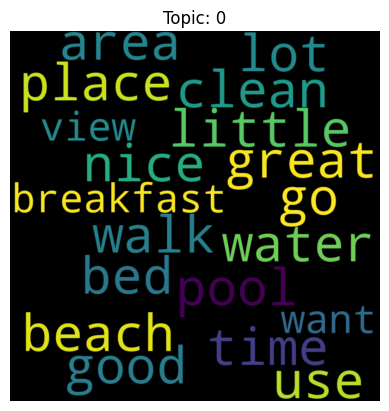

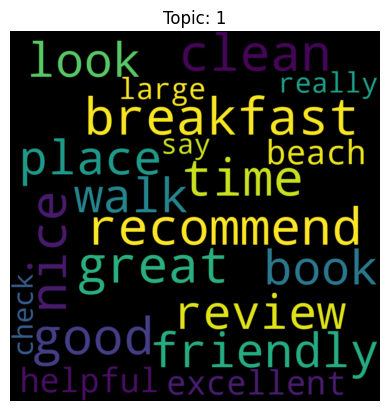

In [ ]:
# LDA optimized WordCloud

print('-------------------------------------------------- LDA OPTIMIZED WORDCLOUD/TOPIC--------------------------------------------------\n\n')
for topic_id, topic in enumerate(lda_model_opt.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()

In [ ]:
# LDA models perplexity

print('LDA base perplexity:\n ', lda_model_base.log_perplexity(corpus))
print('\n\n LDA optimized perplexity:\n ', lda_model_opt.log_perplexity(corpus))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA base perplexity:
  -7.751927649047207


 LDA optimized perplexity:
  -7.349745038936133


In [ ]:
# Visualizing topics and top words of optimized LDA model

pyLDAvis.enable_notebook()

results_dir = './nlp'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

LDAvis_data_filepath = os.path.join(results_dir, 'ldavis_prepared_' + str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model_opt, corpus, id2word)

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

pyLDAvis.save_html(LDAvis_prepared, os.path.join(results_dir, 'ldavis_prepared_' + str(num_topics) + '.html'))

LDAvis_prepared


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'pyLDAvis' is not defined

### __3.2 BertTopic__


In [ ]:
# Loading pre-trained DistilBert and tokenizing data['Review']

model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

max_length = 512
tokenized = data['Review'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=max_length, truncation=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Padding

max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Masking

attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(205, 512)

In [ ]:
# Generating embeddings

input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

features = last_hidden_states[0][:,0,:].numpy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### __3.2.1 BertTopic base model__


In [ ]:
# BertTopic base model

topic_model_base = BERTopic(embedding_model=None)

topics, probs = topic_model_base.fit_transform(data['Review'], embeddings=features)

data['Base Topic'] = topics

topic_model_base.save("bertopic_model_base")

base_topic_info = topic_model_base.get_topic_info()
print(base_topic_info)

topic_model_base.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-07-25 08:22:00,320 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


   Topic  Count                         Name  \
0     -1     84      -1_hotel_room_not_great   
1      0     47  0_hotel_room_great_location   
2      1     30        1_hotel_great_nice_nt   
3      2     30      2_not_beach_food_resort   
4      3     14         3_nt_great_hotel_did   

                                                             Representation  \
0         [hotel, room, not, great, stay, staff, location, good, rooms, nt]   
1  [hotel, room, great, location, stay, stayed, staff, breakfast, city, nt]   
2   [hotel, great, nice, nt, location, good, room, staff, breakfast, clean]   
3                 [not, beach, food, resort, room, pool, no, did, good, nt]   
4           [nt, great, hotel, did, like, place, beach, time, resort, stay]   

                                                                                                                                                                                                                                            

In [ ]:
# Bert topic base model heatmap visualization of similarity score betweem topics

topic_model_base.visualize_heatmap()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Bert topic base model bar chart visualization of top words per topic

fig = topic_model_base.visualize_barchart(top_n_topics=10)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### __3.2.2 BertTopic param / optimized model__

In [ ]:
# BertTopic param model - inserting parameters to optimize model

min_topic_size = 10
nr_topics = 'auto'
ngram_range = (1, 2)

vectorizer_model = CountVectorizer(stop_words='english', ngram_range=ngram_range, min_df=5)

topic_model_param = BERTopic(embedding_model=None, min_topic_size=min_topic_size, nr_topics=nr_topics, vectorizer_model=vectorizer_model)

topics, probs = topic_model_param.fit_transform(data['Review'], embeddings=features)

data['Base Topic'] = topics

topic_model_param.save("topic_model_param")

param_topic_info = topic_model_param.get_topic_info()
print(param_topic_info)

topic_model_param.visualize_topics()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



KeyError: 'topics_from'

In [ ]:
# Bert topic param model heatmap visualization of similarity score betweem topics

topic_model_param.visualize_heatmap()

In [ ]:
# Bert topic param model bar chart visualization of top words per topic

fig = topic_model_param.visualize_barchart(top_n_topics=10)
fig.show()

## __Supervised Learning - Text Classification__

### <a name="p8-3">BoW</a>

Creation of a new df to store the results of the classifiers:

In [ ]:
clf_results = pd.DataFrame([])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Base BoW Vectorization

In [ ]:
#X_train_bow_vect_base = bow_vect_base.transform(X_train)
#X_test_bow_vect_base  = bow_vect_base.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LinearSVC() model

In [ ]:
SVCmodel_bow_vect_base = LinearSVC()
SVCmodel_bow_vect_base.fit(X_train_bow_vect_base, y_train)
y_pred_svc_bow_vect_base = SVCmodel_bow_vect_base.predict(X_test_bow_vect_base)

print(classification_report(y_test, y_pred_svc_bow_vect_base))
confusion_matrix(y_test, y_pred_svc_bow_vect_base)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.92      1.00      0.96        35

    accuracy                           0.93        41
   macro avg       0.96      0.75      0.81        41
weighted avg       0.93      0.93      0.92        41



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[ 3,  3],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC Base BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_bow_vect_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_bow_vect_base), 3)})])

clf_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Model  Accuracy     F1
0  LinearSVC Base BoW Vectorization Model     0.927  0.959

LogisticRegression model

In [ ]:
LRmodel_bow_vect_base = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_bow_vect_base.fit(X_train_bow_vect_base, y_train)
y_pred_lr_bow_vect_base = LRmodel_bow_vect_base.predict(X_test_bow_vect_base)

print(classification_report(y_test, y_pred_lr_bow_vect_base))
confusion_matrix(y_test, y_pred_lr_bow_vect_base)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.90      1.00      0.95        35

    accuracy                           0.90        41
   macro avg       0.95      0.67      0.72        41
weighted avg       0.91      0.90      0.88        41



array([[ 2,  4],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression Base BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_bow_vect_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_bow_vect_base), 3)})])

clf_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Model  Accuracy     F1
0           LinearSVC Base BoW Vectorization Model     0.927  0.959
0  LogisticRegression Base BoW Vectorization Model     0.902  0.946

Deep Learning Model

In [ ]:
DLmodel_bow_vect_base = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bow_vect_base.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_bow_vect_base.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_bow_vect_base.fit(X_train_bow_vect_base, y_train, epochs=10, validation_data=(X_test_bow_vect_base, y_test))
y_pred_DLmodel_bow_vect_base = DLmodel_bow_vect_base.predict(X_test_bow_vect_base)
y_pred_DLmodel_bow_vect_base_classes = y_pred_DLmodel_bow_vect_base.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_bow_vect_base_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_bow_vect_base_classes))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node EagerPyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 268, in __call__
    return func(device, token, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 146, in __call__
    outputs = self._call(device, args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 153, in _call
    ret = self._func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 519, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 519, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 515, in slice_array
    return training_utils.slice_arrays(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_utils.py", line 47, in slice_arrays
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_utils.py", line 47, in <listcomp>
    entries = [[x[i : i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_960]

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning Base BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_bow_vect_base_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_bow_vect_base_classes), 3)})])

clf_results

Model  Accuracy     F1
0           LinearSVC Base BoW Vectorization Model     0.878  0.932
0  LogisticRegression Base BoW Vectorization Model     0.878  0.933
0        DeepLearning Base BoW Vectorization Model     0.902  0.946

#### Param BoW Vectorization

In [ ]:
# X_train_bow_vect = bow_vect.transform(X_train)
# X_test_bow_vect  = bow_vect.transform(X_test)

LinearSVC() model

In [ ]:
SVCmodel_bow_vect = LinearSVC()
SVCmodel_bow_vect.fit(X_train_bow_vect, y_train)
y_pred_svc_bow_vect = SVCmodel_bow_vect.predict(X_test_bow_vect)

print(classification_report(y_test, y_pred_svc_bow_vect))
confusion_matrix(y_test, y_pred_svc_bow_vect)

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.87      0.97      0.92        35

    accuracy                           0.85        41
   macro avg       0.69      0.57      0.58        41
weighted avg       0.82      0.85      0.82        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([[ 1,  5],
       [ 1, 34]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC Param BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_bow_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_bow_vect), 3)})])

clf_results

Model  Accuracy     F1
0           LinearSVC Base BoW Vectorization Model     0.878  0.932
0  LogisticRegression Base BoW Vectorization Model     0.878  0.933
0        DeepLearning Base BoW Vectorization Model     0.902  0.946
0          LinearSVC Param BoW Vectorization Model     0.854  0.919

LogisticRegression model

In [ ]:
LRmodel_bow_vect = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_bow_vect.fit(X_train_bow_vect, y_train)
y_pred_lr_bow_vect = LRmodel_bow_vect.predict(X_test_bow_vect)

print(classification_report(y_test, y_pred_lr_bow_vect))
confusion_matrix(y_test, y_pred_lr_bow_vect)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.88      1.00      0.93        35

    accuracy                           0.88        41
   macro avg       0.94      0.58      0.61        41
weighted avg       0.89      0.88      0.84        41



array([[ 1,  5],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression Param BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_bow_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_bow_vect), 3)})])

clf_results

Model  Accuracy     F1
0            LinearSVC Base BoW Vectorization Model     0.878  0.932
0   LogisticRegression Base BoW Vectorization Model     0.878  0.933
0         DeepLearning Base BoW Vectorization Model     0.902  0.946
0           LinearSVC Param BoW Vectorization Model     0.854  0.919
0  LogisticRegression Param BoW Vectorization Model     0.878  0.933

Deep Learning Model

In [ ]:
DLmodel_bow_vect = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bow_vect.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_bow_vect.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_bow_vect.fit(X_train_bow_vect, y_train, epochs=10, validation_data=(X_test_bow_vect, y_test))
y_pred_DLmodel_bow_vect = DLmodel_bow_vect.predict(X_test_bow_vect)
y_pred_DLmodel_bow_vect_classes = y_pred_DLmodel_bow_vect.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_bow_vect_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_bow_vect_classes))


Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3033 - loss: 2.0931 - val_accuracy: 0.8537 - val_loss: 1.4395
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8290 - loss: 1.3234 - val_accuracy: 0.8537 - val_loss: 0.9248
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8667 - loss: 0.8604 - val_accuracy: 0.8537 - val_loss: 0.6722
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8322 - loss: 0.5874 - val_accuracy: 0.8537 - val_loss: 0.5537
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8512 - loss: 0.4491 - val_accuracy: 0.8537 - val_loss: 0.4801
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8879 - loss: 0.3024 - val_accuracy: 0.8537 - val_loss: 0.4296
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9578 - loss: 0.2233 - val_accuracy: 0.8537 - val_loss: 0.4036
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9705 - loss: 0.1680 - val_accuracy: 0.8537 - val_loss: 0.3986
Epoch 9/10
6/6 ━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning Param BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_bow_vect_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_bow_vect_classes), 3)})])

clf_results

Model  Accuracy     F1
0            LinearSVC Base BoW Vectorization Model     0.878  0.932
0   LogisticRegression Base BoW Vectorization Model     0.878  0.933
0         DeepLearning Base BoW Vectorization Model     0.902  0.946
0           LinearSVC Param BoW Vectorization Model     0.854  0.919
0  LogisticRegression Param BoW Vectorization Model     0.878  0.933
0        DeepLearning Param BoW Vectorization Model     0.854  0.921

#### N-gram BoW Vectorization

In [ ]:
X_train_bow_ngram_vect = bow_ngram_vect.transform(X_train)
X_test_bow_ngram_vect  = bow_ngram_vect.transform(X_test)

LinearSVC() model

In [ ]:
SVCmodel_bow_ngram_vect = LinearSVC()
SVCmodel_bow_ngram_vect.fit(X_train_bow_ngram_vect, y_train)
y_pred_svc_bow_ngram_vect = SVCmodel_bow_ngram_vect.predict(X_test_bow_ngram_vect)

print(classification_report(y_test, y_pred_svc_bow_ngram_vect))
confusion_matrix(y_test, y_pred_svc_bow_ngram_vect)

              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.87      0.97      0.92        35

    accuracy                           0.85        41
   macro avg       0.69      0.57      0.58        41
weighted avg       0.82      0.85      0.82        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([[ 1,  5],
       [ 1, 34]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC N-gram BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_bow_ngram_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_bow_ngram_vect), 3)})])

clf_results

Model  Accuracy     F1
0            LinearSVC Base BoW Vectorization Model     0.878  0.932
0   LogisticRegression Base BoW Vectorization Model     0.878  0.933
0         DeepLearning Base BoW Vectorization Model     0.902  0.946
0           LinearSVC Param BoW Vectorization Model     0.854  0.919
0  LogisticRegression Param BoW Vectorization Model     0.878  0.933
0        DeepLearning Param BoW Vectorization Model     0.854  0.921
0          LinearSVC N-gram BoW Vectorization Model     0.854  0.919

LogisticRegression model

In [ ]:
LRmodel_bow_ngram_vect = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_bow_ngram_vect.fit(X_train_bow_ngram_vect, y_train)
y_pred_lr_bow_ngram_vect = LRmodel_bow_ngram_vect.predict(X_test_bow_ngram_vect)

print(classification_report(y_test, y_pred_lr_bow_ngram_vect))
confusion_matrix(y_test, y_pred_lr_bow_ngram_vect)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.88      1.00      0.93        35

    accuracy                           0.88        41
   macro avg       0.94      0.58      0.61        41
weighted avg       0.89      0.88      0.84        41



array([[ 1,  5],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression N-gram BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_bow_ngram_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_bow_ngram_vect), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933

Deep Learning Model

In [ ]:
DLmodel_bow_vect_base = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bow_vect_base.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_bow_vect_base.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_bow_vect_base.fit(X_train_bow_vect_base, y_train, epochs=10, validation_data=(X_test_bow_vect_base, y_test))
y_pred_DLmodel_bow_vect_base = DLmodel_bow_vect_base.predict(X_test_bow_vect_base)
y_pred_DLmodel_bow_vect_base_classes = y_pred_DLmodel_bow_vect_base.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_bow_vect_base_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_bow_vect_base_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6517 - loss: 1.9434 - val_accuracy: 0.8537 - val_loss: 1.1932
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8199 - loss: 1.0733 - val_accuracy: 0.8537 - val_loss: 0.7786
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8863 - loss: 0.5538 - val_accuracy: 0.8537 - val_loss: 0.6358
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8639 - loss: 0.3336 - val_accuracy: 0.8537 - val_loss: 0.5296
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9664 - loss: 0.1649 - val_accuracy: 0.8780 - val_loss: 0.4659
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0889 - val_accuracy: 0.8780 - val_loss: 0.4409
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0686 - val_accuracy: 0.8780 - val_loss: 0.4502
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0339 - val_accuracy: 0.8780 - val_loss: 0.4757
Epoch 9/10
6/6 ━━━

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning N-gram BoW Vectorization Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_bow_vect_base_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_bow_vect_base_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933

### <a name="p8-3">TF-IDF</a>

#### TfidfVectorizer without parameters

In [ ]:
X_train_tfidf_base = tfidf_base_vect.transform(X_train)
X_test_tfidf_base  = tfidf_base_vect.transform(X_test)

LinearSVC() model

In [ ]:
SVCmodel_tfidf_base = LinearSVC()
SVCmodel_tfidf_base.fit(X_train_tfidf_base, y_train)
y_pred_svc_tfidf_base = SVCmodel_tfidf_base.predict(X_test_tfidf_base)

print(classification_report(y_test, y_pred_svc_tfidf_base))
confusion_matrix(y_test, y_pred_svc_tfidf_base)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetric

array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC TF-IDF Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_tfidf_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_tfidf_base), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921

LogisticRegression model

In [ ]:
LRmodel_tfidf_base = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_tfidf_base.fit(X_train_tfidf_base, y_train)
y_pred_lr_tfidf_base = LRmodel_tfidf_base.predict(X_test_tfidf_base)

print(classification_report(y_test, y_pred_lr_tfidf_base))
confusion_matrix(y_test, y_pred_lr_tfidf_base)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression TF-IDF Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_tfidf_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_tfidf_base), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_tfidf_base = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf_base.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_tfidf_base.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_tfidf_base.fit(X_train_tfidf_base, y_train, epochs=10, validation_data=(X_test_tfidf_base, y_test))
y_pred_DLmodel_tfidf_base = DLmodel_tfidf_base.predict(X_test_tfidf_base)
y_pred_DLmodel_tfidf_base_classes = y_pred_DLmodel_tfidf_base.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_tfidf_base_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_tfidf_base_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2392 - loss: 2.2942 - val_accuracy: 0.8537 - val_loss: 2.1909
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8296 - loss: 2.1512 - val_accuracy: 0.8537 - val_loss: 1.9846
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8147 - loss: 1.9342 - val_accuracy: 0.8537 - val_loss: 1.6623
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8436 - loss: 1.6078 - val_accuracy: 0.8537 - val_loss: 1.2278
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8742 - loss: 1.1247 - val_accuracy: 0.8537 - val_loss: 0.7959
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8601 - loss: 0.7275 - val_accuracy: 0.8537 - val_loss: 0.5200
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8508 - loss: 0.4976 - val_accuracy: 0.8537 - val_loss: 0.4113
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8651 - loss: 0.3870 - val_accuracy: 0.8537 - val_loss: 0.3641
Epoch 9/10
6/6 ━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning TF-IDF Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_tfidf_base_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_tfidf_base_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921

#### TfidfVectorizer including parameters

In [ ]:
# X_train_tfidf_vect = tfidf_vect.transform(X_train)
# X_test_tfidf_vect  = tfidf_vect.transform(X_test)

LinearSVC() model

In [ ]:
SVCmodel_tfidf_vect = LinearSVC()
SVCmodel_tfidf_vect.fit(X_train_tfidf_vect, y_train)
y_pred_svc_tfidf_vect = SVCmodel_tfidf_vect.predict(X_test_tfidf_vect)

print(classification_report(y_test, y_pred_svc_tfidf_vect))
confusion_matrix(y_test, y_pred_svc_tfidf_vect)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.88      1.00      0.93        35

    accuracy                           0.88        41
   macro avg       0.94      0.58      0.61        41
weighted avg       0.89      0.88      0.84        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([[ 1,  5],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC TF-IDF Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_tfidf_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_tfidf_vect), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933

LogisticRegression model

In [ ]:
LRmodel_tfidf_vect = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_tfidf_vect.fit(X_train_tfidf_vect, y_train)
y_pred_lr_tfidf_vect = LRmodel_tfidf_vect.predict(X_test_tfidf_vect)

print(classification_report(y_test, y_pred_lr_tfidf_vect))
confusion_matrix(y_test, y_pred_lr_tfidf_vect)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression TF-IDF Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_tfidf_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_tfidf_vect), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_tfidf_vect = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf_vect.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_tfidf_vect.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_tfidf_vect.fit(X_train_tfidf_vect, y_train, epochs=10, validation_data=(X_test_tfidf_vect, y_test))
y_pred_DLmodel_tfidf_vect = DLmodel_tfidf_vect.predict(X_test_tfidf_vect)
y_pred_DLmodel_tfidf_vect_classes = y_pred_DLmodel_tfidf_vect.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_tfidf_vect_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_tfidf_vect_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2989 - loss: 2.2743 - val_accuracy: 0.8537 - val_loss: 2.1143
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8608 - loss: 2.0619 - val_accuracy: 0.8537 - val_loss: 1.8634
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8375 - loss: 1.8025 - val_accuracy: 0.8537 - val_loss: 1.5154
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8333 - loss: 1.4307 - val_accuracy: 0.8537 - val_loss: 1.0746
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8184 - loss: 1.0554 - val_accuracy: 0.8537 - val_loss: 0.6744
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.7042 - val_accuracy: 0.8537 - val_loss: 0.4640
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8582 - loss: 0.4845 - val_accuracy: 0.8537 - val_loss: 0.3869
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8498 - loss: 0.4710 - val_accuracy: 0.8537 - val_loss: 0.3533
Epoch 9/10
6/6 ━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning TF-IDF Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_tfidf_vect_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_tfidf_vect_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921

#### TfidfVectorizer including parameters & n-grams

In [ ]:
X_train_tfidf_ngram_vect = tfidf_ngram_vect.transform(X_train)
X_test_tfidf_ngram_vect  = tfidf_ngram_vect.transform(X_test)

LinearSVC() model

In [ ]:
SVCmodel_tfidf_ngram_vect = LinearSVC()
SVCmodel_tfidf_ngram_vect.fit(X_train_tfidf_ngram_vect, y_train)
y_pred_svc_tfidf_ngram_vect = SVCmodel_tfidf_ngram_vect.predict(X_test_tfidf_ngram_vect)

print(classification_report(y_test, y_pred_svc_tfidf_ngram_vect))
confusion_matrix(y_test, y_pred_svc_tfidf_ngram_vect)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.88      1.00      0.93        35

    accuracy                           0.88        41
   macro avg       0.94      0.58      0.61        41
weighted avg       0.89      0.88      0.84        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([[ 1,  5],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC TF-IDF N-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_tfidf_ngram_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_tfidf_ngram_vect), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933

LogisticRegression model

In [ ]:
LRmodel_tfidf_ngram_vect = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_tfidf_ngram_vect.fit(X_train_tfidf_ngram_vect, y_train)
y_pred_lr_tfidf_ngram_vect = LRmodel_tfidf_ngram_vect.predict(X_test_tfidf_ngram_vect)

print(classification_report(y_test, y_pred_lr_tfidf_ngram_vect))
confusion_matrix(y_test, y_pred_lr_tfidf_ngram_vect)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression TF-IDF N-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_tfidf_ngram_vect),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_tfidf_ngram_vect), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_tfidf_ngram_vect = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf_ngram_vect.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_tfidf_ngram_vect.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_tfidf_ngram_vect.fit(X_train_tfidf_ngram_vect, y_train, epochs=10, validation_data=(X_test_tfidf_ngram_vect, y_test))
y_pred_DLmodel_tfidf_ngram_vect = DLmodel_tfidf_ngram_vect.predict(X_test_tfidf_ngram_vect)
y_pred_DLmodel_tfidf_ngram_vect_classes = y_pred_DLmodel_tfidf_ngram_vect.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_tfidf_ngram_vect_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_tfidf_ngram_vect_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3038 - loss: 2.2693 - val_accuracy: 0.8537 - val_loss: 2.1166
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8348 - loss: 2.0698 - val_accuracy: 0.8537 - val_loss: 1.8752
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8396 - loss: 1.8127 - val_accuracy: 0.8537 - val_loss: 1.5192
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8314 - loss: 1.4522 - val_accuracy: 0.8537 - val_loss: 1.0795
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8740 - loss: 1.0170 - val_accuracy: 0.8537 - val_loss: 0.6898
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.7303 - val_accuracy: 0.8537 - val_loss: 0.4871
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.5256 - val_accuracy: 0.8537 - val_loss: 0.4069
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8511 - loss: 0.5087 - val_accuracy: 0.8537 - val_loss: 0.3677
Epoch 9/10
6/6 ━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning TF-IDF N-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_tfidf_ngram_vect_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_tfidf_ngram_vect_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921

### <a name="p8-3">Word2Vec - CBOW</a>

In [ ]:
def transform_text_to_vector(texts, model):
    vector_size = model.vector_size
    transformed_texts = []

    for text in texts:
        # Initialize an empty vector
        text_vector = np.zeros(vector_size)
        word_count = 0

        for word in text:
            if word in model.wv:
                text_vector += model.wv[word]
                word_count += 1

        if word_count > 0:
            text_vector /= word_count  # Average the vector
        transformed_texts.append(text_vector)

    return np.array(transformed_texts)

#### CBOW base without any parameters

In [ ]:
X_train_cbow_base = transform_text_to_vector(X_train, cbow_base)
X_test_cbow_base = transform_text_to_vector(X_test, cbow_base)

LinearSVC() model

In [ ]:
SVCmodel_cbow_base = LinearSVC()
SVCmodel_cbow_base.fit(X_train_cbow_base, y_train)
y_pred_svc_cbow_base = SVCmodel_cbow_base.predict(X_test_cbow_base)

print(classification_report(y_test, y_pred_svc_cbow_base))
confusion_matrix(y_test, y_pred_svc_cbow_base)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetric

array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC CBOW Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_cbow_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_cbow_base), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921

LogisticRegression model

In [ ]:
LRmodel_cbow_base = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_cbow_base.fit(X_train_cbow_base, y_train)
y_pred_lr_cbow_base = LRmodel_cbow_base.predict(X_test_cbow_base)

print(classification_report(y_test, y_pred_lr_cbow_base))
confusion_matrix(y_test, y_pred_lr_cbow_base)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression CBOW Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_cbow_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_cbow_base), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_cbow_base = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_cbow_base.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_cbow_base.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_cbow_base.fit(X_train_cbow_base, y_train, epochs=10, validation_data=(X_test_cbow_base, y_test))
y_pred_DLmodel_cbow_base = DLmodel_cbow_base.predict(X_test_cbow_base)
y_pred_DLmodel_cbow_base_classes = y_pred_DLmodel_cbow_base.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_cbow_base_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_cbow_base_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5643 - loss: 2.3003 - val_accuracy: 0.8537 - val_loss: 2.2930
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 2.2908 - val_accuracy: 0.8537 - val_loss: 2.2834
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8173 - loss: 2.2815 - val_accuracy: 0.8537 - val_loss: 2.2739
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 2.2720 - val_accuracy: 0.8537 - val_loss: 2.2644
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 2.2627 - val_accuracy: 0.8537 - val_loss: 2.2549
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8162 - loss: 2.2536 - val_accuracy: 0.8537 - val_loss: 2.2455
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 2.2439 - val_accuracy: 0.8537 - val_loss: 2.2360
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 2.2349 - val_accuracy: 0.8537 - val_loss: 2.2265
Epoch 9/10
6/6 ━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning CBOW Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_cbow_base_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_cbow_base_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921

#### CBOW with parameters

In [ ]:
X_train_cbow_param = transform_text_to_vector(X_train, cbow_param)
X_test_cbow_param = transform_text_to_vector(X_test, cbow_param)

LinearSVC() model

In [ ]:
SVCmodel_cbow_param = LinearSVC()
SVCmodel_cbow_param.fit(X_train_cbow_param, y_train)
y_pred_svc_cbow_param = SVCmodel_cbow_param.predict(X_test_cbow_param)

print(classification_report(y_test, y_pred_svc_cbow_param))
confusion_matrix(y_test, y_pred_svc_cbow_param)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetric

array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC CBOW with Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_cbow_param),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_cbow_param), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921

LogisticRegression model

In [ ]:
LRmodel_cbow_param = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_cbow_param.fit(X_train_cbow_param, y_train)
y_pred_lr_cbow_param = LRmodel_cbow_param.predict(X_test_cbow_param)

print(classification_report(y_test, y_pred_lr_cbow_param))
confusion_matrix(y_test, y_pred_lr_cbow_param)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression CBOW with Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_cbow_param),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_cbow_param), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_cbow_param = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_cbow_param.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_cbow_param.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_cbow_param.fit(X_train_cbow_param, y_train, epochs=10, validation_data=(X_test_cbow_param, y_test))
y_pred_DLmodel_cbow_param = DLmodel_cbow_param.predict(X_test_cbow_param)
y_pred_DLmodel_cbow_param_classes = y_pred_DLmodel_cbow_param.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_cbow_param_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_cbow_param_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3202 - loss: 2.0001 - val_accuracy: 0.8537 - val_loss: 1.3013
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8578 - loss: 1.2127 - val_accuracy: 0.8537 - val_loss: 0.7757
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8788 - loss: 0.7088 - val_accuracy: 0.8537 - val_loss: 0.5640
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.6035 - val_accuracy: 0.8537 - val_loss: 0.5085
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8037 - loss: 0.7143 - val_accuracy: 0.8537 - val_loss: 0.4869
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.5369 - val_accuracy: 0.8537 - val_loss: 0.4724
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.5041 - val_accuracy: 0.8537 - val_loss: 0.4653
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.5594 - val_accuracy: 0.8537 - val_loss: 0.4733
Epoch 9/10
6/6 ━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning CBOW with Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_cbow_param_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_cbow_param_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921

#### CBOW base with parameters & N-grams

In [ ]:
X_train_cbow_ngram = transform_text_to_vector(X_train, cbow_ngram)
X_test_cbow_ngram = transform_text_to_vector(X_test, cbow_ngram)

LinearSVC() model

In [ ]:
SVCmodel_cbow_ngram = LinearSVC()
SVCmodel_cbow_ngram.fit(X_train_cbow_ngram, y_train)
y_pred_svc_cbow_ngram = SVCmodel_cbow_ngram.predict(X_test_cbow_ngram)

print(classification_report(y_test, y_pred_svc_cbow_ngram ))
confusion_matrix(y_test, y_pred_svc_cbow_ngram )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetric

array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC CBOW with n-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_cbow_ngram ),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_cbow_ngram ), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921

LogisticRegression model

In [ ]:
LRmodel_cbow_ngram = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_cbow_ngram.fit(X_train_cbow_ngram, y_train)
y_pred_lr_cbow_ngram = LRmodel_cbow_ngram.predict(X_test_cbow_ngram)

print(classification_report(y_test, y_pred_lr_cbow_ngram))
confusion_matrix(y_test, y_pred_lr_cbow_ngram)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression CBOW with n-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_cbow_ngram),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_cbow_ngram), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_cbow_ngram = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_cbow_ngram.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_cbow_ngram.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_cbow_ngram.fit(X_train_cbow_ngram, y_train, epochs=10, validation_data=(X_test_cbow_ngram, y_test))
y_pred_DLmodel_cbow_ngram = DLmodel_cbow_ngram.predict(X_test_cbow_ngram)
y_pred_DLmodel_cbow_ngram_classes = y_pred_DLmodel_cbow_ngram.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_cbow_ngram_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_cbow_ngram_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3257 - loss: 2.1551 - val_accuracy: 0.8537 - val_loss: 1.6932
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 1.5690 - val_accuracy: 0.8537 - val_loss: 1.1996
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8403 - loss: 1.1298 - val_accuracy: 0.8537 - val_loss: 0.7900
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.7527 - val_accuracy: 0.8537 - val_loss: 0.5771
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.5819 - val_accuracy: 0.8537 - val_loss: 0.5021
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - loss: 0.5685 - val_accuracy: 0.8537 - val_loss: 0.4761
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.6098 - val_accuracy: 0.8537 - val_loss: 0.4679
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8434 - loss: 0.4994 - val_accuracy: 0.8537 - val_loss: 0.4718
Epoch 9/10
6/6 ━━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning CBOW with n-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_cbow_ngram_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_cbow_ngram_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921

### <a name="p8-3">Word2Vec - Skipgram</a>

#### Skip-gram base without any parameters

In [ ]:
X_train_skip_base = transform_text_to_vector(X_train, skip_base)
X_test_skip_base = transform_text_to_vector(X_test, skip_base)

LinearSVC() model

In [ ]:
SVCmodel_skip_base = LinearSVC()
SVCmodel_skip_base.fit(X_train_skip_base, y_train)
y_pred_svc_skip_base = SVCmodel_skip_base.predict(X_test_skip_base)

print(classification_report(y_test, y_pred_svc_skip_base))
confusion_matrix(y_test, y_pred_svc_skip_base)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetric

array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC Skip-gram Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_skip_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_skip_base), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921

LogisticRegression model

In [ ]:
LRmodel_skip_base = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_skip_base.fit(X_train_skip_base, y_train)
y_pred_lr_skip_base = LRmodel_skip_base.predict(X_test_skip_base)

print(classification_report(y_test, y_pred_lr_skip_base))
confusion_matrix(y_test, y_pred_lr_skip_base)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression Skip-gram Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_skip_base),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_skip_base), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_skip_base = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_skip_base.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_skip_base.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_skip_base.fit(X_train_skip_base, y_train, epochs=10, validation_data=(X_test_skip_base, y_test))
y_pred_DLmodel_skip_base = DLmodel_skip_base.predict(X_test_skip_base)
y_pred_DLmodel_skip_base_classes = y_pred_DLmodel_skip_base.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_skip_base_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_skip_base_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5759 - loss: 2.3003 - val_accuracy: 0.8537 - val_loss: 2.2930
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 2.2908 - val_accuracy: 0.8537 - val_loss: 2.2834
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8154 - loss: 2.2815 - val_accuracy: 0.8537 - val_loss: 2.2738
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 2.2721 - val_accuracy: 0.8537 - val_loss: 2.2643
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 2.2627 - val_accuracy: 0.8537 - val_loss: 2.2547
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 2.2537 - val_accuracy: 0.8537 - val_loss: 2.2453
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 2.2444 - val_accuracy: 0.8537 - val_loss: 2.2359
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8385 - loss: 2.2351 - val_accuracy: 0.8537 - val_loss: 2.2265
Epoch 9/10
6/6 ━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning Skip-gram Base Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_skip_base_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_skip_base_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921

#### Skip-gram with parameters

In [ ]:
X_train_skip_param = transform_text_to_vector(X_train, skip_param)
X_test_skip_param = transform_text_to_vector(X_test, skip_param)

LinearSVC() model

In [ ]:
SVCmodel_skip_param = LinearSVC()
SVCmodel_skip_param.fit(X_train_skip_param, y_train)
y_pred_svc_skip_param = SVCmodel_skip_param.predict(X_test_skip_param)

print(classification_report(y_test, y_pred_svc_skip_param))
confusion_matrix(y_test, y_pred_svc_skip_param)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetric

array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC Skip-gram with Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_skip_param),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_skip_param), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921
0          LinearSVC Skip-gram with Parameters Model     0.854  0.921

LogisticRegression model

In [ ]:
LRmodel_skip_param = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_skip_param.fit(X_train_skip_param, y_train)
y_pred_lr_skip_param = LRmodel_skip_param.predict(X_test_skip_param)

print(classification_report(y_test, y_pred_lr_skip_param))
confusion_matrix(y_test, y_pred_lr_skip_param)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression Skip-gram with Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_skip_param),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_skip_param), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921
0          LinearSVC Skip-gram with Parameters Model     0.854  0.921
0  LogisticRegression Skip-gram with Parameters M...     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_skip_param = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_skip_param.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_skip_param.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_skip_param.fit(X_train_skip_param, y_train, epochs=10, validation_data=(X_test_skip_param, y_test))
y_pred_DLmodel_skip_param = DLmodel_skip_param.predict(X_test_skip_param)
y_pred_DLmodel_skip_param_classes = y_pred_DLmodel_skip_param.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_skip_param_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_skip_param_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8429 - loss: 1.7530 - val_accuracy: 0.8537 - val_loss: 1.0808
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 1.0590 - val_accuracy: 0.8537 - val_loss: 0.6702
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.7521 - val_accuracy: 0.8537 - val_loss: 0.5522
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8225 - loss: 0.7072 - val_accuracy: 0.8537 - val_loss: 0.4941
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8323 - loss: 0.5743 - val_accuracy: 0.8537 - val_loss: 0.5099
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.5101 - val_accuracy: 0.8537 - val_loss: 0.4901
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.5070 - val_accuracy: 0.8537 - val_loss: 0.4653
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.5368 - val_accuracy: 0.8537 - val_loss: 0.4543
Epoch 9/10
6/6 ━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning Skip-gram with Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_skip_param_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_skip_param_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921
0          LinearSVC Skip-gram with Parameters Model     0.854  0.921
0  LogisticRegression Skip-gram with Parameters M...     0.854  0.921
0       DeepLearning Skip-gram with Parameters Model     0.854  0.921

#### Skip-gram base with parameters & N-grams

In [ ]:
X_train_skip_ngram = transform_text_to_vector(X_train, skip_ngram)
X_test_skip_ngram = transform_text_to_vector(X_test, skip_ngram)

LinearSVC() model

In [ ]:
SVCmodel_skip_ngram = LinearSVC()
SVCmodel_skip_ngram.fit(X_train_skip_ngram, y_train)
y_pred_svc_skip_ngram = SVCmodel_skip_ngram.predict(X_test_skip_ngram)

print(classification_report(y_test, y_pred_svc_skip_ngram))
confusion_matrix(y_test, y_pred_svc_skip_ngram)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetric

array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LinearSVC Skip-gram with n-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_skip_ngram),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_skip_ngram), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921
0          LinearSVC Skip-gram with Parameters Model     0.854  0.921
0  LogisticRegression Skip-gram with Parameters M...     0.854  0.921
0       DeepLearning Skip-gram with Parameters Model     0.854  0.921
0  LinearSVC Skip-gram with n-grams & Parameters ...     0.854  0.921

LogisticRegression model

In [ ]:
LRmodel_skip_ngram = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel_skip_ngram.fit(X_train_skip_ngram, y_train)
y_pred_lr_skip_ngram = LRmodel_skip_ngram.predict(X_test_skip_ngram)

print(classification_report(y_test, y_pred_lr_skip_ngram))
confusion_matrix(y_test, y_pred_lr_skip_ngram)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41



/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  6],
       [ 0, 35]])

Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'LogisticRegression Skip-gram with n-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr_skip_ngram),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr_skip_ngram), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921
0          LinearSVC Skip-gram with Parameters Model     0.854  0.921
0  LogisticRegression Skip-gram with Parameters M...     0.854  0.921
0       DeepLearning Skip-gram with Parameters Model     0.854  0.921
0  LinearSVC Skip-gram with n-grams & Parameters ...     0.854  0.921
0  LogisticRegression Skip-gram with n-grams & Pa...     0.854  0.921

Deep Learning Model

In [ ]:
DLmodel_skip_ngram = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_skip_ngram.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

DLmodel_skip_ngram.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = DLmodel_skip_ngram.fit(X_train_skip_ngram, y_train, epochs=10, validation_data=(X_test_skip_ngram, y_test))
y_pred_DLmodel_skip_ngram = DLmodel_skip_ngram.predict(X_test_skip_ngram)
y_pred_DLmodel_skip_ngram_classes = y_pred_DLmodel_skip_ngram.argmax(axis=-1)

print(classification_report(y_test, y_pred_DLmodel_skip_ngram_classes))
print(confusion_matrix(y_test, y_pred_DLmodel_skip_ngram_classes))

Epoch 1/10


/Users/maria/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5169 - loss: 1.9342 - val_accuracy: 0.8537 - val_loss: 1.3253
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8311 - loss: 1.2453 - val_accuracy: 0.8537 - val_loss: 0.8642
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.8482 - val_accuracy: 0.8537 - val_loss: 0.6192
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.6971 - val_accuracy: 0.8537 - val_loss: 0.5489
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8229 - loss: 0.7123 - val_accuracy: 0.8537 - val_loss: 0.5071
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.6607 - val_accuracy: 0.8537 - val_loss: 0.4781
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8370 - loss: 0.5401 - val_accuracy: 0.8537 - val_loss: 0.4831
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.5163 - val_accuracy: 0.8537 - val_loss: 0.4819
Epoch 9/10
6/6 ━━━━

/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add the results of the df

In [ ]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'DeepLearning Skip-gram with n-grams & Parameters Model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_DLmodel_skip_ngram_classes),3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_DLmodel_skip_ngram_classes), 3)})])

clf_results

Model  Accuracy     F1
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0            LinearSVC Param BoW Vectorization Model     0.854  0.919
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921
0          LinearSVC Skip-gram with Parameters Model     0.854  0.921
0  LogisticRegression Skip-gram with Parameters M...     0.854  0.921
0       DeepLearning Skip-gram with Parameters Model     0.854  0.921
0  LinearSVC Skip-gram with n-grams & Parameters ...     0.854  0.921
0  LogisticRegression Skip-gram with n-grams & Pa...     0.854  0.921
0  DeepLearning Skip-gram with n-grams & Paramete...     0.854  0.921

Sort the results

In [ ]:
clf_results.sort_values(by='F1', ascending=False, inplace=True)
clf_results

Model  Accuracy     F1
0          DeepLearning Base BoW Vectorization Model     0.902  0.946
0   LogisticRegression Param BoW Vectorization Model     0.878  0.933
0    LogisticRegression Base BoW Vectorization Model     0.878  0.933
0  LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
0        DeepLearning N-gram BoW Vectorization Model     0.878  0.933
0        LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
0                  LinearSVC TF-IDF Parameters Model     0.878  0.933
0             LinearSVC Base BoW Vectorization Model     0.878  0.932
0            LogisticRegression Skip-gram Base Model     0.854  0.921
0     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
0  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
0  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
0                     LinearSVC Skip-gram Base Model     0.854  0.921
0          LinearSVC Skip-gram with Parameters Model     0.854  0.921
0                  DeepLearning Skip-gram Base Model     0.854  0.921
0      LogisticRegression CBOW with Parameters Model     0.854  0.921
0  LogisticRegression Skip-gram with Parameters M...     0.854  0.921
0       DeepLearning Skip-gram with Parameters Model     0.854  0.921
0  LinearSVC Skip-gram with n-grams & Parameters ...     0.854  0.921
0  LogisticRegression Skip-gram with n-grams & Pa...     0.854  0.921
0            DeepLearning CBOW with Parameters Model     0.854  0.921
0                          LinearSVC CBOW Base Model     0.854  0.921
0               LinearSVC CBOW with Parameters Model     0.854  0.921
0                       DeepLearning CBOW Base Model     0.854  0.921
0                 LogisticRegression CBOW Base Model     0.854  0.921
0     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
0  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
0               DeepLearning TF-IDF Parameters Model     0.854  0.921
0         LogisticRegression TF-IDF Parameters Model     0.854  0.921
0                     DeepLearning TF-IDF Base Model     0.854  0.921
0               LogisticRegression TF-IDF Base Model     0.854  0.921
0                        LinearSVC TF-IDF Base Model     0.854  0.921
0         DeepLearning Param BoW Vectorization Model     0.854  0.921
0  DeepLearning Skip-gram with n-grams & Paramete...     0.854  0.921
0           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
0            LinearSVC Param BoW Vectorization Model     0.854  0.919

With corrected index

In [ ]:
clf_results = clf_results.set_index(pd.Index(range(1, len(clf_results) + 1)))
clf_results

Model  Accuracy     F1
1           DeepLearning Base BoW Vectorization Model     0.902  0.946
2    LogisticRegression Param BoW Vectorization Model     0.878  0.933
3     LogisticRegression Base BoW Vectorization Model     0.878  0.933
4   LogisticRegression N-gram BoW Vectorization Model     0.878  0.933
5         DeepLearning N-gram BoW Vectorization Model     0.878  0.933
6         LinearSVC TF-IDF N-grams & Parameters Model     0.878  0.933
7                   LinearSVC TF-IDF Parameters Model     0.878  0.933
8              LinearSVC Base BoW Vectorization Model     0.878  0.932
9             LogisticRegression Skip-gram Base Model     0.854  0.921
10     LinearSVC CBOW with n-grams & Parameters Model     0.854  0.921
11  LogisticRegression CBOW with n-grams & Paramet...     0.854  0.921
12  DeepLearning CBOW with n-grams & Parameters Model     0.854  0.921
13                     LinearSVC Skip-gram Base Model     0.854  0.921
14          LinearSVC Skip-gram with Parameters Model     0.854  0.921
15                  DeepLearning Skip-gram Base Model     0.854  0.921
16      LogisticRegression CBOW with Parameters Model     0.854  0.921
17  LogisticRegression Skip-gram with Parameters M...     0.854  0.921
18       DeepLearning Skip-gram with Parameters Model     0.854  0.921
19  LinearSVC Skip-gram with n-grams & Parameters ...     0.854  0.921
20  LogisticRegression Skip-gram with n-grams & Pa...     0.854  0.921
21            DeepLearning CBOW with Parameters Model     0.854  0.921
22                          LinearSVC CBOW Base Model     0.854  0.921
23               LinearSVC CBOW with Parameters Model     0.854  0.921
24                       DeepLearning CBOW Base Model     0.854  0.921
25                 LogisticRegression CBOW Base Model     0.854  0.921
26     DeepLearning TF-IDF N-grams & Parameters Model     0.854  0.921
27  LogisticRegression TF-IDF N-grams & Parameters...     0.854  0.921
28               DeepLearning TF-IDF Parameters Model     0.854  0.921
29         LogisticRegression TF-IDF Parameters Model     0.854  0.921
30                     DeepLearning TF-IDF Base Model     0.854  0.921
31               LogisticRegression TF-IDF Base Model     0.854  0.921
32                        LinearSVC TF-IDF Base Model     0.854  0.921
33         DeepLearning Param BoW Vectorization Model     0.854  0.921
34  DeepLearning Skip-gram with n-grams & Paramete...     0.854  0.921
35           LinearSVC N-gram BoW Vectorization Model     0.854  0.919
36            LinearSVC Param BoW Vectorization Model     0.854  0.919

#### LIME

In [ ]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#LIME Text Explainer
class_names = ['negative', 'positive']
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
def predict_proba(texts):
    X_vect = bow_vect_base.transform(texts).toarray()
    decision = SVCmodel_bow_vect_base.decision_function(X_vect)
    proba = expit(decision)
    return np.vstack([1 - proba, proba]).T

In [ ]:
i = 7

explanation = explainer.explain_instance(data.iloc[i]['Joined Lemmatized Review'], predict_proba, num_features=10)
explanation.show_in_notebook(text=True)

/Users/maria/anaconda3/lib/python3.11/site-packages/lime/explanation.py:194: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
data['Review'].iloc[10]

'disappointed wondered actually punta cana hotel totally isolated not nearby, grounds kept dissapponted beach area expecting white sand gourgeous blue ocean.there not proper beach chairs nerver clean, pool area nice.now entertainement quite frankly nothing little bad, bored evenings quests.the food did not make ill howver tasteless not nearly expect hotel claims 5 star.i people restaurants tried hard lack training experience, hotel needs better management.oh yeah bus ride airport terrible not unhealthy, needs done.next time punta cana area staying bavero beach instead apparently area real punta cana,  '

In [ ]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

/Users/maria/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [ ]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load the pre-trained model and tokenizer
model_name = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Function to translate text from English to French using T5
def translate(text, source_lang="English", target_lang="French"):
    input_text = f"translate {source_lang} to {target_lang}: {text}"
    inputs = tokenizer(input_text, return_tensors='pt', truncation=True, max_length=512)

    # Perform the translation
    translated_tokens = model.generate(**inputs)
    # Decode the translated tokens
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

    return translated_text

# Sample DataFrame with an English column
#data = {
#    'english_text': [
#        "Hello, how are you?",
#        "What is your name?",
#        "How was your day?",
#        "I need help with my homework."
#    ]
#}

#df = pd.DataFrame(data)

# Apply translation to the 'english_text' column
data['french_translation'] = data.iloc[10]['Review'].apply(lambda x: translate(x))

# Print the DataFrame with translations
print(data)

/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.com

/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.com

/Users/maria/anaconda3/lib/python3.11/site-packages/transformers/models/t5/tokenization_t5.py:217: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so noth

/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)
/Users/maria/anaconda3/lib/python3.11/site-packages/ipywidgets/widgets/widget.py:528: DeprecationWarning: The `ipykernel.com

AttributeError: 'str' object has no attribute 'apply'

In [ ]:
# Load the pre-trained model and tokenizer
model_name = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Function to translate text from English to French using T5
def translate(text, source_lang="English", target_lang="French"):
    input_text = f"translate {source_lang} to {target_lang}: {text}"
    inputs = tokenizer(input_text, return_tensors='pt', truncation=True, max_length=512)

    # Perform the translation
    translated_tokens = model.generate(**inputs)
    # Decode the translated tokens
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)

    return translated_text

# Apply translation to the 'Review' column
data['french_translation'] = data['Review'].apply(lambda x: translate(x))

# Print the DataFrame with translations
print(data)


/Users/maria/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1254: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


                                                  Review  Rating  \
15664  wow, loved ritzzzzzzz, hi, read grumbles ritz ...       5   
7790   wonderful pre-cruise stay husband stayed night...       5   
2542   sad blindfolded dropped place thing know islan...       1   
1929   great location good price great rates hotel co...       3   
4198   great hotel toronto great hotel located main s...       5   
...                                                  ...     ...   
488      issues n't say 4 star service great pool bar,         3   
7711   lovely boutique hotel middle new york hustle g...       4   
2137   comfortable convenient stayed night deluxe roo...       4   
19783  fantastic apartment location stayed hotel week...       5   
14613  great stay affinia trip new york husband 3 you...       4   

                                        Processed Review  \
15664  wow loved ritzzzzzzz hi read grumbles rite sta...   
7790   wonderful precise stay husband stayed nights l...   
254

## Named Entity Recognition (NER)

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
ner_pipeline = spacy.load('en_core_web_sm')

In [ ]:
ner_pipeline_labels = ner_pipeline.get_pipe('ner').labels
ner_pipeline_labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [ ]:
for i in ner_pipeline_labels:
    explanation = spacy.explain(i)
    print(f"{i}: {explanation}")

CARDINAL: Numerals that do not fall under another type
DATE: Absolute or relative dates or periods
EVENT: Named hurricanes, battles, wars, sports events, etc.
FAC: Buildings, airports, highways, bridges, etc.
GPE: Countries, cities, states
LANGUAGE: Any named language
LAW: Named documents made into laws.
LOC: Non-GPE locations, mountain ranges, bodies of water
MONEY: Monetary values, including unit
NORP: Nationalities or religious or political groups
ORDINAL: "first", "second", etc.
ORG: Companies, agencies, institutions, etc.
PERCENT: Percentage, including "%"
PERSON: People, including fictional
PRODUCT: Objects, vehicles, foods, etc. (not services)
QUANTITY: Measurements, as of weight or distance
TIME: Times smaller than a day
WORK_OF_ART: Titles of books, songs, etc.


In [ ]:
sample_text = data['Review'].iloc[150]

In [ ]:
len(sample_text.split('.'))

1

In [ ]:
ner_text = ner_pipeline(sample_text)

In [ ]:
for word in ner_text.ents:
    print(word.text, word.label_,word.start_char, word.end_char)

22-24 2005 DATE 78 88
3-hour TIME 147 153
canada GPE 170 176
6th ORDINAL 259 262
caribbean LOC 375 384
69 night TIME 386 394
15/24 hours TIME 602 613


In [ ]:
len([ent for ent in ner_text.ents if ent.label_ == 'GPE'])

1

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(ner_text, style="ent",jupyter=True)

Custom NER

In [ ]:
# function in order to label data
def label_data(reviews):
    labeled_data = []
    for review in reviews:
        entities = []
        org_patterns = [r'\bHilton\b', r'\bMarriott\b', r'\bHotel\b', r'\bhotel\b', r'\bSheraton\b', r'\bHoliday Inn\b', r'\bHyatt\b']
        money_patterns = [r'\bpay \$\d+', r'\bpay \€\d+', r'\bpay \£\d+',r'\$\d+', r'\€\d+', r'\£\d+']
        loc_patterns = [
            r'\bParis\b', r'\bNew York\b', r'\bLondon\b', r'\bChicago\b', r'\bBarcelona\b', r'\bAthens\b', r'\bMexico City\b',
            r'\bTokyo\b', r'\bSeoul\b', r'\bLisbon\b', r'\bRome\b', r'\bMilan\b', r'\bMiami\b', r'\bAmsterdam\b', r'\bDubai\b',
            r'\bMumbai\b', r'\bAustin\b', r'\bLima\b', r'\bBerlin\b', r'\bToronto\b', r'\bSydney\b', r'\bBudapest\b',
            r'\bparis\b', r'\bnew york\b', r'\blondon\b', r'\bchicago\b', r'\bbarcelona\b', r'\bathens\b', r'\bmexico city\b',
            r'\btokyo\b', r'\bseoul\b', r'\blisbon\b', r'\brome\b', r'\bmilan\b', r'\bmiami\b', r'\bamsterdam\b', r'\bdubai\b',
            r'\bmumbai\b', r'\baustin\b', r'\blima\b', r'\bberlin\b', r'\btoronto\b', r'\bsydney\b', r'\bbudapest\b'
        ]
        date_patterns = [
            r'\b\d{4}\b',r'\b\d{2}/\d{2}/\d{4}\b',r'\b\d{2}-\d{2}-\d{4}\b',r'\b\d{2} \d{2} \d{4}\b',
            r'\b\d{1,2}(st|nd|rd|th)? \b\w+ \d{4}\b',r'\b\w+ \d{1,2}(st|nd|rd|th)?,\d{4}\b',
            r'\b\w+ \d{1,2}, \d{4}\b',r'\b\d{1,2} \w+ \d{4}\b',r'\b\d{1,2}/\d{1,2}/\d{2,4}\b',r'\b\d{1,2}-\d{1,2}-\d{2,4}\b',
            r'\b\d{1,2} \w+ \d{2,4}\b',r'\b\w+ \d{1,2}\b',r'\b\d{1,2} \w+\b',r'\b\d{2} \w+ \d{2}\b',r'\b\d{1,2} \w+ \d{2}\b'
        ]

        staff_patterns = [
            r'\bstaff\b.*\bgood\b', r'\bstaff\b.*\bhelpful\b', r'\bstaff\b.*\bbad\b', r'\bstaff\b.*\bcomplaints\b',
            r'\bgood\b.*\bstaff\b', r'\bhelpful\b.*\bstaff\b', r'\bbad\b.*\bstaff\b', r'\bcomplaints\b.*\bstaff\b'
        ]

        for pattern in org_patterns:
            for match in re.finditer(pattern, review):
                entities.append((match.start(), match.end(), "ORG"))

        for pattern in money_patterns:
            for match in re.finditer(pattern, review):
                entities.append((match.start(), match.end(), "MONEY"))

        for pattern in loc_patterns:
            for match in re.finditer(pattern, review):
                entities.append((match.start(), match.end(), "LOC"))

        for pattern in date_patterns:
            for match in re.finditer(pattern, review):
                entities.append((match.start(), match.end(), "DATE"))

        labeled_data.append((review, {"entities": entities}))
    return labeled_data

In [ ]:
# Apply the function to the first 200 reviews
labeled_reviews = label_data(data['Review'].head(500))

nlp = spacy.blank("en")  # create blank Language class
doc_bin = DocBin()

In [ ]:
for text, annot in labeled_reviews:
    doc = nlp.make_doc(text)
    ents = []

    # Sort entities by start position to ensure non-overlapping entities are added first
    sorted_entities = sorted(annot["entities"], key=lambda x: x[0])

    for start, end, label in sorted_entities:
        span = doc.char_span(start, end, label=label)
        if span is not None:
            # Check for overlaps before appending
            overlap = False
            for existing_span in ents:
                if existing_span.start_char < end and start < existing_span.end_char:
                    overlap = True
                    break
            if not overlap:
                ents.append(span)
    doc.ents = ents
    doc_bin.add(doc)

doc_bin.to_disk("train_data.spacy")

In [ ]:
import random

# Load the blank model and create a new NER pipeline
nlp = spacy.blank("en")
ner = nlp.add_pipe("ner")

# Add new labels to the NER
for _, annotations in labeled_reviews:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

In [ ]:
doc_bin = DocBin().from_disk("train_data.spacy")
TRAIN_DATA = list(doc_bin.get_docs(nlp.vocab))

In [ ]:
optimizer = nlp.begin_training()
for i in range(20):  # Number of iterations
    random.shuffle(TRAIN_DATA)
    losses = {}
    for doc in TRAIN_DATA:
        example = Example.from_dict(doc, {"entities": [(ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]})
        nlp.update([example], drop=0.5, losses=losses)
    print(f"Iteration {i+1} - Losses: {losses}")

Iteration 1 - Losses: {'ner': 2078.9124262848773}
Iteration 2 - Losses: {'ner': 369.40847545991744}
Iteration 3 - Losses: {'ner': 275.72765771814653}
Iteration 4 - Losses: {'ner': 184.22421510522105}
Iteration 5 - Losses: {'ner': 148.354759400426}
Iteration 6 - Losses: {'ner': 134.70518487947024}
Iteration 7 - Losses: {'ner': 136.8693680398763}
Iteration 8 - Losses: {'ner': 105.28130727652831}
Iteration 9 - Losses: {'ner': 92.14706267771957}
Iteration 10 - Losses: {'ner': 100.63297884680816}
Iteration 11 - Losses: {'ner': 77.97886873725616}
Iteration 12 - Losses: {'ner': 52.87334344295649}
Iteration 13 - Losses: {'ner': 58.08329052270927}
Iteration 14 - Losses: {'ner': 58.035925072304636}
Iteration 15 - Losses: {'ner': 58.79984707401987}
Iteration 16 - Losses: {'ner': 74.37468539713215}
Iteration 17 - Losses: {'ner': 49.99728476679148}
Iteration 18 - Losses: {'ner': 49.12324866489865}
Iteration 19 - Losses: {'ner': 46.66599118234598}
Iteration 20 - Losses: {'ner': 63.82667405426363}


In [ ]:
nlp.to_disk("ner_model")

# Example testing
test_text = data['Review'].iloc[150]
doc = nlp(test_text)

# Print the entities recognized by the model
for ent in doc.ents:
    print(ent.text, ent.label_)


hotel ORG
24 2005 DATE
beautiful 3 DATE
69 night DATE
hotel ORG
